## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import calendar
import warnings
import datetime
import re
import sys
import seaborn as sns
from datetime import date
from matplotlib.colors import LinearSegmentedColormap
warnings.filterwarnings('ignore')

In [2]:
## Provide Start Date and End Date for the Data Processing
## Note : Start Date should be less than the end date
Start_D = input('Provide Start Date in format (YYYY-MM-DD):')
End_D = input('Provide End Date in format (YYYY-MM-DD):')

Provide Start Date in format (YYYY-MM-DD):2023-03-01
Provide End Date in format (YYYY-MM-DD):2023-03-20


In [3]:
#Select the Product/Service for which you want to observe the data
#Option
print("Select the option --> UDP or CLARITY or CAMS or UDP2 or API or DEVOPS or DAP or INQUISITO or PKI")
prod = input('Product:')

Select the option --> UDP or CLARITY or CAMS or UDP2 or API or DEVOPS or DAP or INQUISITO or PKI
Product:


In [4]:
#Select the Year for which you want to observe the data
#Option
print("Select the option --> Year(YYYY) in range between 2021-2029")
while True:
    try:
        year_2022 = input('Year(YYYY): ')
        if not re.match("^202[1-9]$", year_2022):
            raise ValueError   
        break
    except ValueError:
            print('Error! Only provide in Year Format yyyy in range between 2021-2029')

print("Select the option --> Year(YYYY) in range between 2021-2029")
while True:
    try:
        year_2023 = input('Year(YYYY): ')
        if not re.match("^202[1-9]$", year_2023):
            raise ValueError   
        break
    except ValueError:
            print('Error! Only provide in Year Format yyyy in range between 2021-2029')

Select the option --> Year(YYYY) in range between 2021-2029
Year(YYYY): 2023
Select the option --> Year(YYYY) in range between 2021-2029
Year(YYYY): 2023


In [5]:
# creating an empty list
month_2022 = []
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

while True:
    try:
        n = int(input("Enter number of Months in Integer (1 or 2): "))
        if n < 1 or n > 2:
            raise ValueError #this will send it to the print message and back to the input option
        break
    except ValueError:
        print('Please enter an integer 1 or 2')
        
# iterating till the range
print("Month in format Mmm")
print("For example January as Jan")
for i in range(0, n):
    while True:
        try:
            ele = input("Month-{} in format Mmm: ".format(i+1))
            #if not re.match("^[A-Z][a-z][a-z]$", ele):
            #    raise ValueError
            if ele not in months:
                raise ValueError
            break
        except ValueError:
            print('Error! Only provide in Month Format Mmm!')
    month_2022.append(ele) # adding the element
print(month_2022)

Enter number of Months in Integer (1 or 2): 1
Month in format Mmm
For example January as Jan
Month-1 in format Mmm: Mar
['Mar']


In [6]:
month_2023 = []
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

while True:
    try:
        n = int(input("Enter number of Months in Integer (1 or 2): "))
        if n < 1 or n > 2:
            raise ValueError #this will send it to the print message and back to the input option
        break
    except ValueError:
        print('Please enter an integer 1 or 2')
        
# iterating till the range
print("Month in format Mmm")
print("For example January as Jan")
for i in range(0, n):
    while True:
        try:
            ele = input("Month-{} in format Mmm: ".format(i+1))
            #if not re.match("^[A-Z][a-z][a-z]$", ele):
            #    raise ValueError
            if ele not in months:
                raise ValueError
            break
        except ValueError:
            print('Error! Only provide in Month Format Mmm!')
    month_2023.append(ele) # adding the element
print(month_2023)

Enter number of Months in Integer (1 or 2): 1
Month in format Mmm
For example January as Jan
Month-1 in format Mmm: Mar
['Mar']


## Combining Similar Sheets from Multiple Excel Files Together 

## 1. List down all the Excel files

In [7]:
file_list_2022 = []

for i in range(len(month_2022)):
    file_list_2022.append("Weekly-Monthly-KPI-{}-{}.xlsx".format(month_2022[i],year_2022))
print("File List:")
for j in range(len(file_list_2022)):
    print(file_list_2022[j])

File List:
Weekly-Monthly-KPI-Mar-2023.xlsx


In [8]:
file_list_2023 = []

for i in range(len(month_2023)):
    file_list_2023.append("Weekly-Monthly-KPI-{}-{}.xlsx".format(month_2023[i],year_2023))
print("File List:")
for j in range(len(file_list_2023)):
    print(file_list_2023[j])

File List:
Weekly-Monthly-KPI-Mar-2023.xlsx


In [9]:
file_list = file_list_2022 + file_list_2023
file_list

['Weekly-Monthly-KPI-Mar-2023.xlsx', 'Weekly-Monthly-KPI-Mar-2023.xlsx']

## 2. Import specific sheets from all the excels files and consolidate them into one

In [10]:
finalDF = pd.DataFrame()

for file in file_list:
    sheets = pd.ExcelFile(""+file)
    myWorkSheets = sheets.sheet_names
    for sheet in myWorkSheets:
        if sheet.startswith("Pager") or sheet.startswith("BigPanda"):
            df = pd.read_excel(""+file,sheet_name=sheet)
            finalDF = finalDF.append(df)
finalDF

,Jira Ticket,BigPanda Incident Link,Description,Service,Location,Priority,Customer Impacted,Opened On,Incident End,First Assignment,...,Mean time to Reslove (MTTR),Resolved By User,No Action Required,Resolved by NOC Engineer,Escalated to SME,TSG,RCA,Total Alerts,Incident Start time,Escalated Time
0,INC-3405,PagerDuty,Clarity Prod JP: CRITICAL - P4 - 0.5% Subjects...,Clarity,JP,P4,1 user(0.64% impacted),2023-03-01 02:10:00,2023-03-01 03:28:00,2023-03-01 02:10:00,...,78.0,Sutheshna Raman,Yes,No,No,Yes,It was a blip,1,2023-03-01 02:09:00,NaN
1,INC-3407,PagerDuty,Clarity Prod JP: CRITICAL - P4 - 0.5% Subjects...,Clarity,US,P4,36 users (0.50% Impacted),2023-03-01 04:51:00,2023-03-01 07:37:00,2023-03-01 04:51:00,...,166.0,Varsha Rana,Yes,No,No,Yes,It was a blip,1,2023-03-01 04:50:00,NaN
2,INC-3408,PagerDuty,UDP2 Prod US: Cloudflare 403 Count Above Thre...,UDP2,US,P4,No Customer Impact,2023-03-01 04:41:00,2023-03-01 05:25:00,2023-03-01 04:41:00,...,44.0,Bhavya Parikh,Yes,No,No,No,It was a blip,1,2023-03-01 04:40:00,NaN
3,INC-3416,PagerDuty,UDP2 Prod US: Critical - Follow - Follower-Eve...,UDP2,US,P4,No Customer Impact,2023-03-01 15:55:00,2023-03-01 20:40:00,2023-03-01 15:55:00,...,285.0,Atharva Jagdale,Yes,No,No,No,It was a blip,4,2023-03-01 15:54:00,NaN
4,INC-3417,PagerDuty,UDP2 Prod US: Critical - Realtime - Completed ...,UDP2,US,P4,No Customer Impact,2023-03-01 15:55:00,2023-03-01 19:01:00,2023-03-01 15:55:00,...,186.0,Atharva Jagdale,Yes,No,No,No,It was a blip,3,2023-03-01 15:54:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,INC-3563,[6413c2701ed3330014346095](https://a.bigpanda....,UDP2 Prod US: Critical - Services Overall - Se...,udp2,us,P4,No Customer Impact,2023-03-16 18:29:00,2023-03-16 18:32:00,2023-03-16 18:29:00,...,3.0,Pavan K,Yes,No,No,No,It was a blip,1,2023-03-16 18:29:00,NaN
121,INC-3564,[6413c68a5b000000015963c5](https://a.bigpanda....,[Recovered on {consumer_group:realtimemessagei...,udp2,us,P4,No Customer Impact,2023-03-16 18:33:00,2023-03-16 20:41:00,NaT,...,128.0,NaN,Yes,No,No,Yes,It was a blip,4,2023-03-16 18:33:00,NaN
122,INC-3565,[6413df56a7d61e0012ae86fe](https://a.bigpanda....,UDP2 Prod US: Critical - Push Notification - F...,udp2,us,P4,No Customer Impact,2023-03-16 20:32:00,2023-03-16 20:35:00,2023-03-16 20:33:00,...,3.0,Sathya A,Yes,No,No,No,It was a blip,2,2023-03-16 20:33:00,NaN
123,INC-3566,[6413f7fbd7d022001abb5756](https://a.bigpanda....,[Recovered on {consumer_group:realtimemessagei...,udp2,us,P4,No Customer Impact,2023-03-16 22:17:00,2023-03-16 23:44:00,2023-03-16 22:18:00,...,87.0,Sathya A,Yes,No,No,Yes,It was a blip,2,2023-03-16 22:18:00,NaN


## Checking total number of rows and columns for dataset

In [11]:
finalDF.shape

(336, 27)

## Copying data to new Dataframe

In [12]:
df11 = finalDF.copy()

## Dropping unwanted Columns

In [13]:
df11.drop(['BigPanda Incident Link','Jira Ticket Updated'], axis = 1,inplace=True)

In [14]:
# Find the no of rows and columns in the data
df11.shape

(336, 25)

In [15]:
# Checking the column names
df11.columns

Index(['Jira Ticket ', 'Description', 'Service', 'Location ', 'Priority',
       'Customer Impacted', 'Opened On', 'Incident End', 'First Assignment',
       'Actioned Time', 'Jira Ticket Created', 'Mean time to Detection (MTTD)',
       'Mean time to Engage (MTTE)', 'Time to Escalate ',
       'Mean time to Action (MTTA)', 'Mean time to Reslove (MTTR)',
       'Resolved By User', 'No Action Required', 'Resolved by NOC Engineer',
       'Escalated to SME', 'TSG', 'RCA', 'Total Alerts', 'Incident Start time',
       'Escalated Time'],
      dtype='object')

## Chaning Column Names

In [16]:
df11.columns = ['Jira Ticket','Subject','Product','Location','Priority','Customer Impacted','Date Time','Incident End','First Assignment','Actioned Time', 'Ticket created on','TTD','TTE','TTAE','TTA','TTR','Assignee','NAR','RNE','ETS','TSG','RCA','Total Alerts','Incident Start time',
       'Escalated Time']

## Observing the Dataset

In [17]:
df11.head()

,Jira Ticket,Subject,Product,Location,Priority,Customer Impacted,Date Time,Incident End,First Assignment,Actioned Time,...,TTR,Assignee,NAR,RNE,ETS,TSG,RCA,Total Alerts,Incident Start time,Escalated Time
0,INC-3405,Clarity Prod JP: CRITICAL - P4 - 0.5% Subjects...,Clarity,JP,P4,1 user(0.64% impacted),2023-03-01 02:10:00,2023-03-01 03:28:00,2023-03-01 02:10:00,NaT,...,78.0,Sutheshna Raman,Yes,No,No,Yes,It was a blip,1,2023-03-01 02:09:00,NaT
1,INC-3407,Clarity Prod JP: CRITICAL - P4 - 0.5% Subjects...,Clarity,US,P4,36 users (0.50% Impacted),2023-03-01 04:51:00,2023-03-01 07:37:00,2023-03-01 04:51:00,NaT,...,166.0,Varsha Rana,Yes,No,No,Yes,It was a blip,1,2023-03-01 04:50:00,NaT
2,INC-3408,UDP2 Prod US: Cloudflare 403 Count Above Thre...,UDP2,US,P4,No Customer Impact,2023-03-01 04:41:00,2023-03-01 05:25:00,2023-03-01 04:41:00,NaT,...,44.0,Bhavya Parikh,Yes,No,No,No,It was a blip,1,2023-03-01 04:40:00,NaT
3,INC-3416,UDP2 Prod US: Critical - Follow - Follower-Eve...,UDP2,US,P4,No Customer Impact,2023-03-01 15:55:00,2023-03-01 20:40:00,2023-03-01 15:55:00,NaT,...,285.0,Atharva Jagdale,Yes,No,No,No,It was a blip,4,2023-03-01 15:54:00,NaT
4,INC-3417,UDP2 Prod US: Critical - Realtime - Completed ...,UDP2,US,P4,No Customer Impact,2023-03-01 15:55:00,2023-03-01 19:01:00,2023-03-01 15:55:00,NaT,...,186.0,Atharva Jagdale,Yes,No,No,No,It was a blip,3,2023-03-01 15:54:00,NaT


# Check dataset information for data handling

In [18]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 0 to 124
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Jira Ticket          336 non-null    object        
 1   Subject              336 non-null    object        
 2   Product              336 non-null    object        
 3   Location             336 non-null    object        
 4   Priority             336 non-null    object        
 5   Customer Impacted    336 non-null    object        
 6   Date Time            336 non-null    datetime64[ns]
 7   Incident End         336 non-null    datetime64[ns]
 8   First Assignment     326 non-null    datetime64[ns]
 9   Actioned Time        96 non-null     object        
 10  Ticket created on    330 non-null    object        
 11  TTD                  336 non-null    int64         
 12  TTE                  326 non-null    float64       
 13  TTAE                 266 non-null  

In [19]:
# Identify the type of data for each column --- Numerical, Categorical , Ordinal

# #  Column               Non-Null Count  Dtype            Type
#---  ------               --------------  -----         -----------
# 0   Jira Ticket          71 non-null     object   ---> Categorical
# 1   Subject              71 non-null     object   ---> Categorical
# 2   Product              71 non-null     object   ---> Categorical
# 3   Location             71 non-null     object   ---> Categorical
# 4   Priority             71 non-null     object   ---> Ordinal
# 5   Customer Impacted    71 non-null     object   ---> Categorical
# 6   Date Time            71 non-null     object   ---> Date and Time
# 7   Incident End         71 non-null     object   ---> Date and Time
# 8   First Assignment     71 non-null     object   ---> Date and Time
# 9   Actioned Time        2 non-null      object   ---> Date and Time
# 10  Ticket created on    37 non-null     object   ---> Date and Time
# 11  TTD                  71 non-null     int64    ---> Numerical Continous
# 12  TTE                  71 non-null     int64    ---> Numerical Continous
# 13  TTAE                 71 non-null     int64    ---> Numerical Continous
# 14  TTA                  71 non-null     int64    ---> Numerical Continous
# 15  TTR                  71 non-null     int64    ---> Numerical Continous
# 16  Assignee             71 non-null     object   ---> Categorical
# 17  NAR                  71 non-null     object   ---> Numerical Discrete [0-1]
# 18  RNE                  71 non-null     object   ---> Numerical Discrete [0-1]
# 19  ETS                  71 non-null     object   ---> Numerical Discrete [0-1]
# 20  TSG                  71 non-null     object   ---> Numerical Discrete [0-1]
# 21  RCA                  71 non-null     object   ---> Categorical
# 22  Total Alerts         71 non-null     int64    ---> Numerical Continous
# 23  Incident Start time  28 non-null     object   ---> Date and Time
# 24  Escalated Time       1 non-null      object   ---> Date and Time

In [20]:
# From the above data we can see that we need to change the Data type of few columns. 
# 4   Priority             from     object   ---> Ordinal
# 6   Date Time            from     object   ---> Date and Time

# Check and Remove all DUPLICATE RECORDS from the DATAFRAME

In [21]:
# Check all DUPLICATE RECORDS from the DATAFRAME
df11[df11.duplicated()]

,Jira Ticket,Subject,Product,Location,Priority,Customer Impacted,Date Time,Incident End,First Assignment,Actioned Time,...,TTR,Assignee,NAR,RNE,ETS,TSG,RCA,Total Alerts,Incident Start time,Escalated Time
0,INC-3405,Clarity Prod JP: CRITICAL - P4 - 0.5% Subjects...,Clarity,JP,P4,1 user(0.64% impacted),2023-03-01 02:10:00,2023-03-01 03:28:00,2023-03-01 02:10:00,NaN,...,78.0,Sutheshna Raman,Yes,No,No,Yes,It was a blip,1,2023-03-01 02:09:00,NaN
1,INC-3407,Clarity Prod JP: CRITICAL - P4 - 0.5% Subjects...,Clarity,US,P4,36 users (0.50% Impacted),2023-03-01 04:51:00,2023-03-01 07:37:00,2023-03-01 04:51:00,NaN,...,166.0,Varsha Rana,Yes,No,No,Yes,It was a blip,1,2023-03-01 04:50:00,NaN
2,INC-3408,UDP2 Prod US: Cloudflare 403 Count Above Thre...,UDP2,US,P4,No Customer Impact,2023-03-01 04:41:00,2023-03-01 05:25:00,2023-03-01 04:41:00,NaN,...,44.0,Bhavya Parikh,Yes,No,No,No,It was a blip,1,2023-03-01 04:40:00,NaN
3,INC-3416,UDP2 Prod US: Critical - Follow - Follower-Eve...,UDP2,US,P4,No Customer Impact,2023-03-01 15:55:00,2023-03-01 20:40:00,2023-03-01 15:55:00,NaN,...,285.0,Atharva Jagdale,Yes,No,No,No,It was a blip,4,2023-03-01 15:54:00,NaN
4,INC-3417,UDP2 Prod US: Critical - Realtime - Completed ...,UDP2,US,P4,No Customer Impact,2023-03-01 15:55:00,2023-03-01 19:01:00,2023-03-01 15:55:00,NaN,...,186.0,Atharva Jagdale,Yes,No,No,No,It was a blip,3,2023-03-01 15:54:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,INC-3563,UDP2 Prod US: Critical - Services Overall - Se...,udp2,us,P4,No Customer Impact,2023-03-16 18:29:00,2023-03-16 18:32:00,2023-03-16 18:29:00,NaN,...,3.0,Pavan K,Yes,No,No,No,It was a blip,1,2023-03-16 18:29:00,NaN
121,INC-3564,[Recovered on {consumer_group:realtimemessagei...,udp2,us,P4,No Customer Impact,2023-03-16 18:33:00,2023-03-16 20:41:00,NaT,NaN,...,128.0,NaN,Yes,No,No,Yes,It was a blip,4,2023-03-16 18:33:00,NaN
122,INC-3565,UDP2 Prod US: Critical - Push Notification - F...,udp2,us,P4,No Customer Impact,2023-03-16 20:32:00,2023-03-16 20:35:00,2023-03-16 20:33:00,NaN,...,3.0,Sathya A,Yes,No,No,No,It was a blip,2,2023-03-16 20:33:00,NaN
123,INC-3566,[Recovered on {consumer_group:realtimemessagei...,udp2,us,P4,No Customer Impact,2023-03-16 22:17:00,2023-03-16 23:44:00,2023-03-16 22:18:00,NaN,...,87.0,Sathya A,Yes,No,No,Yes,It was a blip,2,2023-03-16 22:18:00,NaN


In [22]:
# Remove all DUPLICATE RECORDS from the DATAFRAME
df11.drop_duplicates(inplace=True)

In [23]:
# Replacing all the 0 values in TTD with 1
df11.TTD.replace(0,1,inplace=True)
df11.TTD.replace(np.nan,1,inplace=True)

In [24]:
# Replacing all the Null values in TTE with 0
df11.TTE.replace(np.nan,1,inplace=True)

In [25]:
df11.TTAE.unique()

array([ nan,  20.,  15.,   2.,   6.,   1.,  26.,  30., 108.,   0.,   3.,
         8.,  38.,  10.])

In [26]:
df11.TTA.unique()

array([ nan, 124.,   0.,   6., 134.,   3., 105.,  40.])

In [27]:
# Replacing all the 0 values in TTA with NUll Values
df11.TTA.replace(0,np.nan,inplace=True)

In [28]:
# Replacing all the 0 values in TTAE with 1
df11.TTAE.replace(0,np.nan,inplace=True)

## Changing the Date Time column from String to Date Time format

In [29]:
df11['Date Time'] = pd.to_datetime(df11['Date Time'])
df11['Incident Start time'] = pd.to_datetime(df11['Incident Start time'])
df11['Date'] = df11['Date Time'].dt.strftime('%m-%d-%Y')
df11['Date'] = pd.to_datetime(df11['Date'])
df11['Month'] = pd.DatetimeIndex(df11['Date Time']).month
df11['Day'] = pd.DatetimeIndex(df11['Date Time']).day
df11['Year'] = pd.DatetimeIndex(df11['Date Time']).year
df11['Quarter'] = pd.DatetimeIndex(df11['Date Time']).quarter
df11['Week'] = pd.DatetimeIndex(df11['Date Time']).week
df11['Weekday'] = pd.DatetimeIndex(df11['Date Time']).weekday
df11['Weekday'] = df11['Weekday'].apply(lambda x: calendar.day_name[x])
df11['Dayofyear'] = pd.DatetimeIndex(df11['Date Time']).dayofyear
df11['Weekofyear'] = pd.DatetimeIndex(df11['Date Time']).weekofyear
df11['date_ordinal'] = pd.to_datetime(df11['Date Time']).apply(lambda date: date.toordinal())
df11['Hours'] = df11['Date Time'].dt.hour

In [30]:
df11[df11['Incident Start time'] == np.nan]

,Jira Ticket,Subject,Product,Location,Priority,Customer Impacted,Date Time,Incident End,First Assignment,Actioned Time,...,Month,Day,Year,Quarter,Week,Weekday,Dayofyear,Weekofyear,date_ordinal,Hours


In [31]:
df11['Incident Start time'] = pd.to_datetime(df11['Date Time']) - pd.to_timedelta(df11['TTD'], unit='m')

In [32]:
df11['Escalated Time'] = pd.to_datetime(df11['Date Time']) + pd.to_timedelta(df11['TTAE'], unit='m')

In [33]:
df11.TTE.replace('',int(0),inplace=True)

In [34]:
df11['TTE'] = pd.to_numeric(df11['TTE'],errors='coerce')

In [35]:
df11['TTE'] = round(df11['TTE'],1)

In [36]:
df11['Engage Time'] = pd.to_datetime(df11['Date Time']) + pd.to_timedelta(df11['TTE'], unit='m')

In [37]:
df11['Engage Time'] = df11['Engage Time'].astype('datetime64[s]')
df11['Escalated Time'] = df11['Escalated Time'].astype('datetime64[s]')

In [38]:
df11['Product'].unique()

array(['Clarity', 'UDP2', 'CAMS', 'Datadog', 'udp2', 'cams', 'clarity',
       'devops', 'api,cams', 'udp', 'pki', 'api', 'inquisito'],
      dtype=object)

## Changing Data to Upper Case

In [39]:
df11['TSG'] = df11['TSG'].apply(lambda name : name.upper())
df11['Product'] = df11['Product'].apply(lambda name : name.upper())
df11['Location'] = df11['Location'].apply(lambda name : name.upper())
#df11['Assignee'] = df11['Assignee'].apply(lambda name : name.upper())
df11['Weekday'] = df11['Weekday'].apply(lambda name : name.upper())
df11['NAR'] = df11['NAR'].apply(lambda name : name.upper())
df11['RNE'] = df11['RNE'].apply(lambda name : name.upper())
df11['ETS'] = df11['ETS'].apply(lambda name : name.upper())

## Removing Spaces from Product, Priority, Subject, TSG, RCA, Jira Ticket, Customer Impacted and Location

In [40]:
df11.Product = df11.Product.str.replace(" ","")
df11.Priority = df11.Priority.str.replace(" ","")
df11.Location = df11.Location.str.replace(" ","")
df11.TSG = df11.TSG.str.replace(" ","")
df11['Jira Ticket'] = df11['Jira Ticket'].str.strip()
df11['Subject'] = df11['Subject'].str.strip()
df11['Customer Impacted'] = df11['Customer Impacted'].str.strip()
df11['RCA'] = df11['RCA'].str.strip()
df11['NAR'] = df11['NAR'].str.strip()
df11['RNE'] = df11['RNE'].str.strip()
df11['ETS'] = df11['ETS'].str.strip()

## Replacing Name of the Products NILE and UAM

In [41]:
df11.Product = df11.Product.str.replace("NILE","API")
df11.Product = df11.Product.str.replace("UAM","CAMS")

## Chaning Value of TSG from YES & NO to 1 & 0

In [42]:
df11['NAR'] = df11['NAR'].replace({'NO': 0, 'YES': 1})
df11['RNE'] = df11['RNE'].replace({'NO': 0, 'YES': 1})
df11['ETS'] = df11['ETS'].replace({'NO': 0, 'YES': 1})
df11['TSG'] = df11['TSG'].replace({'NO': 0, 'YES': 1,'YES,NO':1,'NO,YES':1})

## Chaning data type from Object to Categorical

In [43]:
df11['Priority'] = pd.Categorical(df11['Priority'])
df11['Product'] = pd.Categorical(df11['Product'])
df11['Location'] = pd.Categorical(df11['Location'])
df11['Assignee'] = pd.Categorical(df11['Assignee'])

In [44]:
#Defining common color for each product
#products = df1.Product.unique()
#product_color = {}
#for i in range(0,len(products)):
#    product_color[products[i]] = str("C")+str(i)

In [45]:
#Defining common color for each product
#priority = df1.Priority.unique()
#priority_color = {}
#for i in range(0,len(priority)):
#    priority_color[priority[i]] = str("C")+str(i)

## Defining common color for each product

In [46]:
product_color = {'UDP': 'C0',
 'CLARITY': 'C1',
 'API': 'C2',
 'DEVOPS': 'C3',
 'SHARE': 'C4',
 'CAMS': 'C5',
 'ARTIFACTORY' : 'C6',
 'COEUS':'C7',
 'JIRA': 'C10',
 'UDP2': 'C11',
 'PKI': 'C13',
 'INQUISITO': 'C14'}


products = list(df11.Product.unique())
for product in products:
    # solve
    product = product.split(',')
final_product = products + product
final_product1 = list(set(final_product))


# initializing remove list
product_list = ['INQUISITO','DEVOPS','CAMS','API','PKI','UDP','CLARITY','UDP2','DAP']
 
# printing original list
print ("The available list is : " + str(final_product1))
 
# printing remove list
print ("The original list is : " + str(product_list))
 
# using list comprehension to perform task
res1 = [i for i in final_product1 if i not in product_list]
 
# printing result
print ("The list after performing remove operation is : " + str(res1))

string = "C"
list1 = res1
list2 = list(range(15,15+len(list1)))
list2 = list(map(lambda orig_string: string + str(orig_string), list2))
list2

# Printing original keys-value lists
print("Original key list is : " + str(list1))
print("Original value list is : " + str(list2))
 
# using naive method
# to convert lists to dictionary
res = {}
for key in list1:
    for value in list2:
        res[key] = value
        list2.remove(value)
        break
 
# Printing resultant dictionary
print("Resultant dictionary is : " + str(res))

def Merge(dict1, dict2):
    return(dict2.update(dict1))

# This will return None
print(Merge(res, product_color))
 
# changes made in product_color    
print(product_color)

The available list is : ['CLARITY', 'DATADOG', 'API', 'UDP', 'CAMS', 'DEVOPS', 'API,CAMS', 'UDP2', 'PKI', 'INQUISITO']
The original list is : ['INQUISITO', 'DEVOPS', 'CAMS', 'API', 'PKI', 'UDP', 'CLARITY', 'UDP2', 'DAP']
The list after performing remove operation is : ['DATADOG', 'API,CAMS']
Original key list is : ['DATADOG', 'API,CAMS']
Original value list is : ['C15', 'C16']
Resultant dictionary is : {'DATADOG': 'C15', 'API,CAMS': 'C16'}
None
{'UDP': 'C0', 'CLARITY': 'C1', 'API': 'C2', 'DEVOPS': 'C3', 'SHARE': 'C4', 'CAMS': 'C5', 'ARTIFACTORY': 'C6', 'COEUS': 'C7', 'JIRA': 'C10', 'UDP2': 'C11', 'PKI': 'C13', 'INQUISITO': 'C14', 'DATADOG': 'C15', 'API,CAMS': 'C16'}


## Defining common color for each priority

In [47]:
priority_color = {'P4': 'C2','P3': 'C0','P2': 'C1','P1': 'C3' }

## Creating a new Column TTAES for finding out the minimum value from TTA and TTAE

In [48]:
df11['TTAES'] = df11[['TTA','TTAE']].min(axis=1)
df11['TTAES'] = df11['TTAES'].fillna(0)
df11['TTAES'] = df11['TTAES'].apply(np.int64)

## Creating a new column RBS (Resolved By SME)

In [49]:
conditions = [(df11.NAR==0) & (df11.RNE==0) & (df11.ETS==1)]
values = [1]
df11['RBS'] = np.select(conditions, values, 0)

## Creating a new column Shift, find out alert came in which shift

In [50]:
df11['Shift'] = df11['Hours'].apply(lambda x: 'Second' if (x>1 and x<10) else ('Night' if (x>9 and x<18) else 'First'))

## Creating a new column Shifts, combining both Day and Shift

In [51]:
df11['Shifts'] = df11['Day'].astype(str) + df11['Shift']

## Setting the threshold value for tte time to engage

In [52]:
tte_P4_threshold = 60
tte_P3_threshold = 20
tte_P2_threshold = 15
tte_P1_threshold = 10

## Setting the threshold value for ttae time to escalate and action

In [53]:
ttae_P4_threshold=75
ttae_P3_threshold=35
ttae_P2_threshold=25
ttae_P1_threshold=20

## Sorting Date Time in ascending order.

In [54]:
df11.sort_values(by="Date Time",inplace=True)

## Handling the Missing Value for Start and End Date

In [55]:
if Start_D == "":
    Start_D = df11.iloc[1,25].strftime('%Y-%m-%d')
    print("Start Date :",Start_D)
else:
    print("Start Date has been already entered")
if End_D == "":
    End_D = df11.iloc[-1,25].strftime('%Y-%m-%d')
    print("End Date :",End_D)
else:
    print("End Date has been already entered")

Start Date has been already entered
End Date has been already entered


## Correcting the Start and End Date Value if the order is entered incorrectly

In [56]:
if Start_D > End_D:
    print("Start Date and End Date will be corrected automatically /n Next time please enter date properly")
    st_dt = End_D
    ed_dt = Start_D
else:
    print("Date Range has been entered properly")
    st_dt = Start_D
    ed_dt = End_D
Start_D = st_dt
End_D = ed_dt
print("Start Date :",Start_D)
print("End Date :",End_D)

Date Range has been entered properly
Start Date : 2023-03-01
End Date : 2023-03-20


## Setting the Date Range as per the user requirement

In [57]:
if prod == "":
    mask = (df11['Date'] >= Start_D) & (df11['Date'] <= End_D)
else:
    mask = (df11['Date'] >= Start_D) & (df11['Date'] <= End_D) & (df11['Product'] == prod)
filtered_df=df11.loc[mask]
df1 = filtered_df.copy()
df1['Date'] = df1['Date'].dt.strftime('%m-%d-%Y')

In [58]:
# Defining Start Date and End Date from the filtered Data.
sd = df1.iloc[1,6]
ed = df1.iloc[-1,6]

In [59]:
print('Date-Range :',sd,'to',ed)
df1.groupby(by='Product').agg(Count=('Product', 'size'),TTD=('TTD', 'mean'), TTE=('TTE', 'mean'),TTA=('TTA', 'mean'),TTES=('TTAE', 'mean') ,TTR=('TTR', 'mean'))

Date-Range : 2023-03-01 02:10:00 to 2023-03-20 05:16:00


,Count,TTD,TTE,TTA,TTES,TTR
Product,,,,,,
API,1,1.0,0.000000,3.000000,NaN,12.000000
"API,CAMS",1,1.0,1.000000,6.000000,NaN,36.000000
CAMS,9,1.0,0.666667,NaN,20.000000,20.888889
CLARITY,43,1.0,0.558140,134.000000,13.000000,105.767442
DATADOG,1,1.0,0.000000,NaN,6.000000,1763.000000
DEVOPS,1,1.0,1.000000,NaN,NaN,2.000000
INQUISITO,1,1.0,0.000000,NaN,NaN,1.000000
PKI,2,1.0,1.500000,NaN,1.000000,127.000000
UDP,2,1.0,0.500000,NaN,NaN,1.000000


In [60]:
df11.RNE.unique()

array([0, 1], dtype=int64)

In [61]:
print('Date-Range :',sd,'to',ed)
df1.groupby('Product').agg(Frequency=('Product', 'size'),Auto_Resolved=('NAR', 'sum'), Action_Taken_by_NOC=('RNE', 'sum'), Escalated_to_SME=('ETS', 'sum'))

Date-Range : 2023-03-01 02:10:00 to 2023-03-20 05:16:00


,Frequency,Auto_Resolved,Action_Taken_by_NOC,Escalated_to_SME
Product,,,,
API,1,0,1,0
"API,CAMS",1,0,1,0
CAMS,9,9,0,2
CLARITY,43,42,0,4
DATADOG,1,1,0,1
DEVOPS,1,1,0,0
INQUISITO,1,1,0,0
PKI,2,2,0,1
UDP,2,2,0,0


In [62]:
print('Date-Range :',sd,'to',ed)
df1_PP = df1.groupby('Priority').agg(Frequency=('Priority', 'size'),TTD=('TTD', 'mean'), TTE=('TTE', 'mean'),TTA=('TTA', 'mean'),TTES=('TTAE', 'mean') , TTR=('TTR', 'mean'),)
df1_PP['Percent'] = round((df1_PP['Frequency'] / df1_PP['Frequency'].sum()) * 100,1)
df1_PP

Date-Range : 2023-03-01 02:10:00 to 2023-03-20 05:16:00


,Frequency,TTD,TTE,TTA,TTES,TTR,Percent
Priority,,,,,,,
P1,1,1.0,0.000000,40.0,10.000000,80.000000,0.6
P3,5,1.0,0.600000,134.0,13.333333,455.400000,3.0
P4,162,1.0,0.679012,59.5,23.300000,56.938272,96.4


In [63]:
print('Date-Range :',sd,'to',ed)
df1.groupby('Priority').agg(Frequency=('Priority', 'size'),Auto_Resolved=('NAR', 'sum'), Action_Taken_by_NOC=('RNE', 'sum'), Escalated_to_SME=('ETS', 'sum'))

Date-Range : 2023-03-01 02:10:00 to 2023-03-20 05:16:00


,Frequency,Auto_Resolved,Action_Taken_by_NOC,Escalated_to_SME
Priority,,,,
P1,1,0,0,1
P3,5,4,0,3
P4,162,158,2,10


In [64]:
print('Date-Range :',sd,'to',ed)
df1_ID = df1.groupby(by='Date').agg(Frequency=('Date', 'size'))
df1_ID['Percent'] = round((df1_ID['Frequency'] / df1_ID['Frequency'].sum()) * 100,1)
df1_ID

Date-Range : 2023-03-01 02:10:00 to 2023-03-20 05:16:00


,Frequency,Percent
Date,,
03-01-2023,21,12.5
03-02-2023,9,5.4
03-03-2023,10,6.0
03-04-2023,12,7.1
03-05-2023,9,5.4
03-06-2023,10,6.0
03-07-2023,16,9.5
03-08-2023,7,4.2
03-09-2023,7,4.2


In [65]:
print('Date-Range :',sd,'to',ed)
df1.groupby('Date').agg(Frequency=('Date', 'size'),TTD=('TTD', 'mean'), TTE=('TTE', 'mean'),TTA=('TTA', 'mean'),TTES=('TTAE', 'mean'), TTR=('TTR', 'mean'),)

Date-Range : 2023-03-01 02:10:00 to 2023-03-20 05:16:00


,Frequency,TTD,TTE,TTA,TTES,TTR
Date,,,,,,
03-01-2023,21,1.0,0.523810,NaN,20.0,70.523810
03-02-2023,9,1.0,0.666667,NaN,NaN,67.777778
03-03-2023,10,1.0,0.600000,6.0,NaN,21.500000
03-04-2023,12,1.0,0.833333,NaN,9.0,68.416667
03-05-2023,9,1.0,0.666667,NaN,NaN,74.333333
03-06-2023,10,1.0,0.800000,134.0,8.0,82.700000
03-07-2023,16,1.0,0.375000,NaN,2.0,65.812500
03-08-2023,7,1.0,0.428571,NaN,3.5,333.000000
03-09-2023,7,1.0,0.714286,NaN,NaN,39.285714


In [66]:
df1_sf  = df1.filter(['Jira Ticket','Product','Location','Priority','Date Time','TTD','TTE','TTA','TTAE','TTR'])

In [67]:
df1_p4 = df1_sf.loc[df1_sf.Priority == "P4"]
df1_p3 = df1_sf.loc[df1_sf.Priority == "P3"]
df1_p2 = df1_sf.loc[df1_sf.Priority == "P2"]
df1_p1 = df1_sf.loc[df1_sf.Priority == "P1"]

## Calculating P4 SLA for TTe and TTae

In [68]:
print('Date-Range :',sd,'to',ed)
if df1_p4.shape[0] == 0:
    print("Their are no P4 Incidents")
else: 
    print("Their are total",df1_p4.shape[0],"P4 Incidents")
    print("##################################################################################################")
    df1_p4['T_TTE_P4'] =df1_p4['TTE'].apply(lambda x: 0 if x < tte_P4_threshold else 1)
    P4_SLA_TTE = round(((df1_p4.shape[0]-df1_p4['T_TTE_P4'].sum())/df1_p4.shape[0])*100,2)
    print("SLA for P4 TTE is",str(P4_SLA_TTE)+"%")
    df1_p4_TTE = df1_p4.loc[df1_p4.T_TTE_P4 == 1]
    if df1_p4_TTE.shape[0] == 0:
        print("No P4 Alerts breached TTE")
    else:
        print("P4 Tickets which missed the SLA for TTE")
        print(df1_p4_TTE.filter(['Jira Ticket','Product','Location','Date Time','TTE_P4']))
    print("##################################################################################################") 
    df1_p4['TTAE_P4'] = df1_p4[['TTA','TTAE']].min(axis=1)
    df1_p4['TTAE_P4'] = df1_p4['TTAE_P4'].fillna(0)
    df1_p4['TTAE_P4'] = df1_p4['TTAE_P4'].apply(np.int64)
    df1_p4['T_TTAE_P4'] =df1_p4['TTAE_P4'].apply(lambda x: 0 if x < ttae_P4_threshold else 1)
    P4_SLA_TTAE = round(((df1_p4.shape[0]-df1_p4['T_TTAE_P4'].sum())/df1_p4.shape[0])*100,2)
    print("SLA for P4 TTAE is",str(P4_SLA_TTAE)+"%")
    df1_p4_TTAE = df1_p4.loc[df1_p4.T_TTAE_P4 == 1]
    if df1_p4_TTAE.shape[0] == 0:
        print("No P4 Alerts breached TTE")
    else:
        print("P4 Tickets which missed the SLA for TTE")
        print(df1_p4_TTAE.filter(['Jira Ticket','Product','Location','Date Time','TTAE_P4']))

Date-Range : 2023-03-01 02:10:00 to 2023-03-20 05:16:00
Their are total 162 P4 Incidents
##################################################################################################
SLA for P4 TTE is 100.0%
No P4 Alerts breached TTE
##################################################################################################
SLA for P4 TTAE is 99.38%
P4 Tickets which missed the SLA for TTE
   Jira Ticket Product Location           Date Time  TTAE_P4
42    INC-3618    UDP2       US 2023-03-20 04:06:00      108


## Calculating P3 SLA for TTe and TTae

In [69]:
print('Date-Range :',sd,'to',ed)
if df1_p3.shape[0] == 0:
    print("Their are no P3 Incidents")
else: 
    print("Their are total",df1_p3.shape[0],"P3 Incidents")
    print("##################################################################################################")
    df1_p3['T_TTE_P3'] =df1_p3['TTE'].apply(lambda x: 0 if x < tte_P3_threshold else 1)
    P3_SLA_TTE = round(((df1_p3.shape[0]-df1_p3['T_TTE_P3'].sum())/df1_p3.shape[0])*100,2)
    print("SLA for P3 TTE is",str(P3_SLA_TTE)+"%")
    df1_p3_TTE = df1_p3.loc[df1_p3.T_TTE_P3 == 1]
    if df1_p3_TTE.shape[0] == 0:
        print("No P3 Alerts breached TTE")
    else:
        print("P3 Tickets which missed the SLA for TTE")
        print(df1_p3_TTE.filter(['Jira Ticket','Product','Location','Date Time','TTE_P3']))
    print("##################################################################################################")
    df1_p3['TTAE_P3'] = df1_p3[['TTA','TTAE']].min(axis=1)
    df1_p3['TTAE_P3'] = df1_p3['TTAE_P3'].fillna(0)
    df1_p3['TTAE_P3'] = df1_p3['TTAE_P3'].apply(np.int64)
    df1_p3['T_TTAE_P3'] =df1_p3['TTAE_P3'].apply(lambda x: 0 if x < ttae_P3_threshold else 1)
    P3_SLA_TTAE = round(((df1_p3.shape[0]-df1_p3['T_TTAE_P3'].sum())/df1_p3.shape[0])*100,2)
    print("SLA for P3 TTAE is",str(P3_SLA_TTAE)+"%")
    df1_p3_TTAE = df1_p3.loc[df1_p3.T_TTAE_P3 == 1]
    if df1_p3_TTAE.shape[0] == 0:
        print("No P3 Alerts breached TTE")
    else:
        print("P3 Tickets which missed the SLA for TTE")
        print(df1_p3_TTAE.filter(['Jira Ticket','Product','Location','Date Time','TTAE_P3']))
    print("##################################################################################################")

Date-Range : 2023-03-01 02:10:00 to 2023-03-20 05:16:00
Their are total 5 P3 Incidents
##################################################################################################
SLA for P3 TTE is 100.0%
No P3 Alerts breached TTE
##################################################################################################
SLA for P3 TTAE is 100.0%
No P3 Alerts breached TTE
##################################################################################################


## Calculating P2 SLA for TTe and TTae

In [70]:
print('Date-Range :',sd,'to',ed)
if df1_p2.shape[0] == 0:
    print("Their are no P2 Incidents")
else: 
    print("Their are total",df1_p2.shape[0],"P2 Incidents")
    df1_p2['T_TTE_P2'] =df1_p2['TTE'].apply(lambda x: 0 if x < tte_P2_threshold else 1)
    P2_SLA_TTE = round(((df1_p2.shape[0]-df1_p2['T_TTE_P2'].sum())/df1_p2.shape[0])*100,2)
    print("SLA for P2 TTE is",str(P2_SLA_TTE)+"%")
    df1_p2_TTE = df1_p2.loc[df1_p2.T_TTE_P2 == 1]
    if df1_p2_TTE.shape[0] == 0:
        print("No P2 Alerts breached TTE")
    else:
        print("P2 Tickets which missed the SLA for TTE")
        print(df1_p2_TTE.filter(['Jira Ticket','Product','Location','Date Time','TTE_P2']))
    print("##################################################################################################")
    df1_p2['TTAE_P2'] = df1_p2[['TTA','TTAE']].min(axis=1)
    df1_p2['TTAE_P2'] = df1_p2['TTAE_P2'].fillna(0)
    df1_p2['TTAE_P2'] = df1_p2['TTAE_P2'].apply(np.int64)
    df1_p2['T_TTAE_P2'] =df1_p2['TTAE_P2'].apply(lambda x: 0 if x < ttae_P2_threshold else 1)
    P2_SLA_TTAE = round(((df1_p2.shape[0]-df1_p2['T_TTAE_P2'].sum())/df1_p2.shape[0])*100,2)
    print("SLA for P2 TTAE is",str(P2_SLA_TTAE)+"%")
    df1_p2_TTAE = df1_p2.loc[df1_p2.T_TTAE_P2 == 1]
    if df1_p2_TTAE.shape[0] == 0:
        print("No P2 Alerts breached TTE")
    else:
        print("P2 Tickets which missed the SLA for TTE ===>")
        print("_______________________________________________")
        print(df1_p2_TTAE.filter(['Jira Ticket','Product','Location','Date Time','TTAE_P2']))

Date-Range : 2023-03-01 02:10:00 to 2023-03-20 05:16:00
Their are no P2 Incidents


## Calculating P1 SLA for TTe and TTae

In [71]:
print('Date-Range :',sd,'to',ed)
if df1_p1.shape[0] == 0:
    print("Their are no P1 Incidents")
else: 
    print("Their are total",df1_p1.shape[0],"P1 Incidents")
    df1_p1['T_TTE_P1'] =df1_p1['TTE'].apply(lambda x: 0 if x < tte_P1_threshold else 1)
    P1_SLA_TTE = round(((df1_p1.shape[0]-df1_p1['T_TTE_P1'].sum())/df1_p1.shape[0])*100,2)
    print("SLA for P1 TTE is",str(P1_SLA_TTE)+"%")
    df1_p1_TTE = df1_p1.loc[df1_p1.T_TTE_P1 == 1]
    if df1_p1_TTE.shape[0] == 0:
        print("No P1 Alerts breached TTE")
    else:
        print("P1 Tickets which missed the SLA for TTE")
        print(df1_p1_TTE.filter(['Jira Ticket','Product','Location','Date Time','TTE_P1']))
    print("##################################################################################################")
    df1_p1['TTAE_P1'] = df1_p1[['TTA','TTAE']].min(axis=1)
    df1_p1['TTAE_P1'] = df1_p1['TTAE_P1'].fillna(0)
    df1_p1['TTAE_P1'] = df1_p1['TTAE_P1'].apply(np.int64)
    df1_p1['T_TTAE_P1'] =df1_p1['TTAE_P1'].apply(lambda x: 0 if x < ttae_P1_threshold else 1)
    P1_SLA_TTAE = round(((df1_p1.shape[0]-df1_p1['T_TTAE_P1'].sum())/df1_p1.shape[0])*100,2)
    print("SLA for P1 TTAE is",str(P1_SLA_TTAE)+"%")
    df1_p1_TTAE = df1_p1.loc[df1_p1.T_TTAE_P1 == 1]
    if df1_p1_TTAE.shape[0] == 0:
        print("No P1 Alerts breached TTE")
    else:
        print("P1 Tickets which missed the SLA for TTE")
        print(df1_p1_TTAE.filter(['Jira Ticket','Product','Location','Date Time','TTAE_P1']))

Date-Range : 2023-03-01 02:10:00 to 2023-03-20 05:16:00
Their are total 1 P1 Incidents
SLA for P1 TTE is 100.0%
No P1 Alerts breached TTE
##################################################################################################
SLA for P1 TTAE is 100.0%
No P1 Alerts breached TTE


In [72]:
%matplotlib inline

## Defining few index

In [73]:
sort_day = ['FRIDAY', 'SATURDAY','SUNDAY', 'MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY']
sort_hour = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
sort_date = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]

Date-Range : 2023-03-01 02:10:00 to 2023-03-20 05:16:00


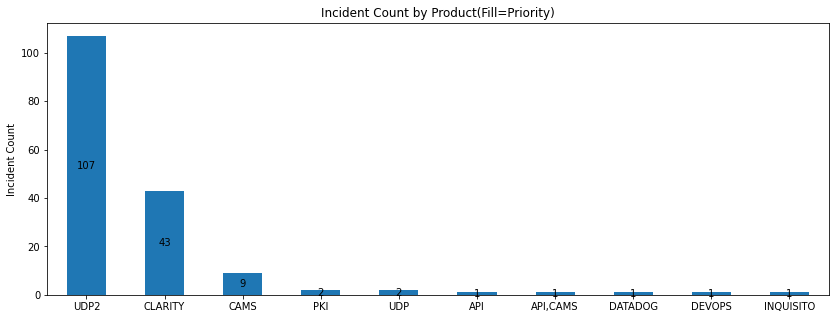

In [74]:
print('Date-Range :',sd,'to',ed)
ax = df1['Product'].value_counts().plot(kind='bar',figsize=(14,5),rot=0)
for c in ax.containers:
    ax.bar_label(c, label_type='center')
plt.xticks(rotation = 360)
plt.title('Incident Count by Product(Fill=Priority)')
plt.ylabel('Incident Count')
plt.show()

## Incident count by Product (Fill-Priority)

Date-Range : 2023-03-01 02:10:00 to 2023-03-20 05:16:00


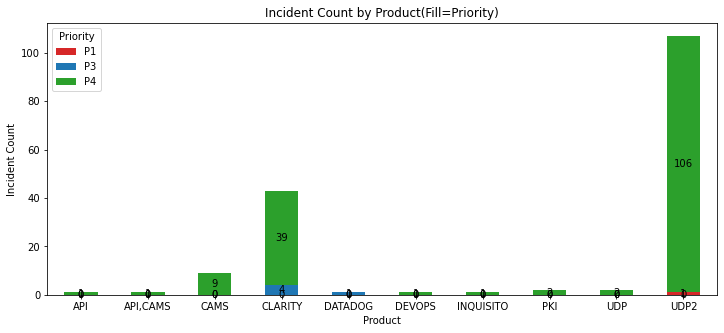

In [75]:
print('Date-Range :',sd,'to',ed)
ax = df1.groupby(['Product','Priority']).size().unstack().plot(kind='bar',stacked=True,figsize=(12,5),color=priority_color, rot=0, xlabel='Product', ylabel='Count')
for c in ax.containers:
    ax.bar_label(c, label_type='center')
plt.xticks(rotation = 360)
plt.title('Incident Count by Product(Fill=Priority)')
plt.ylabel('Incident Count')
plt.show()

## Incident count by Date (Fill-Priority)

Date-Range : 2023-03-01 02:10:00 to 2023-03-20 05:16:00


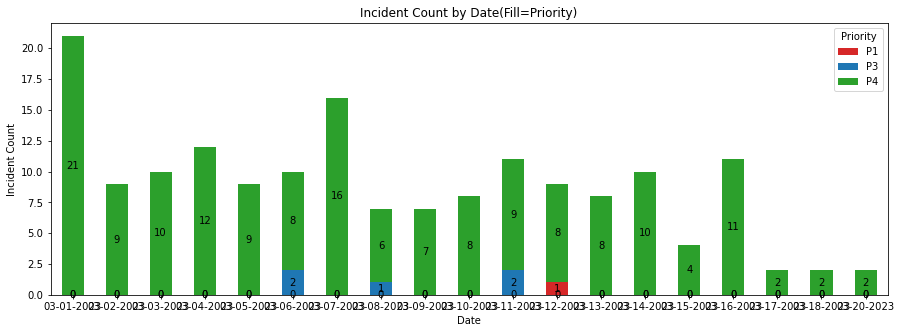

In [76]:
print('Date-Range :',sd,'to',ed)
ax = df1.groupby(['Date','Priority']).size().unstack().plot(kind='bar',stacked=True,figsize=(15,5),color=priority_color)
for c in ax.containers:
    ax.bar_label(c, label_type='center')
plt.xticks(rotation = 360)
plt.title('Incident Count by Date(Fill=Priority)')
plt.ylabel('Incident Count')
plt.show()

Date-Range : 2023-03-01 02:10:00 to 2023-03-20 05:16:00


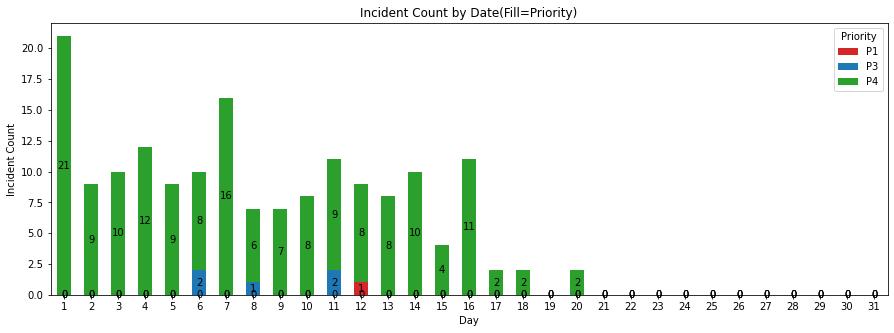

In [77]:
print('Date-Range :',sd,'to',ed)
ax = df1.groupby(['Day','Priority']).size().unstack().reindex(sort_date).plot(kind='bar',stacked=True,figsize=(15,5),color=priority_color)
for c in ax.containers:
    ax.bar_label(c, label_type='center')
plt.xticks(rotation = 360)
plt.title('Incident Count by Date(Fill=Priority)')
plt.ylabel('Incident Count')
plt.show()

## Incident count by Weekday (Fill-Priority)

Date-Range : 2023-03-01 02:10:00 to 2023-03-20 05:16:00


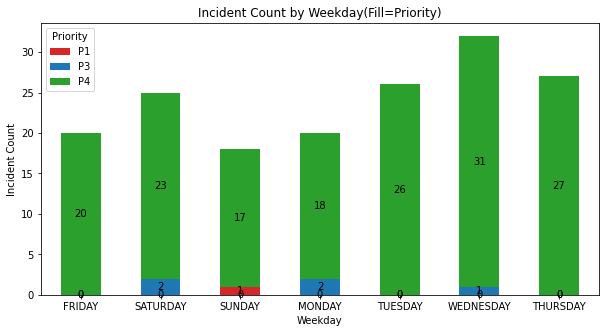

In [78]:
print('Date-Range :',sd,'to',ed)
ax = df1.groupby(['Weekday','Priority']).size().unstack().reindex(sort_day).plot(kind='bar',stacked=True,figsize=(10,5),color=priority_color)
for c in ax.containers:
    ax.bar_label(c, label_type='center')
plt.xticks(rotation = 360)
plt.title('Incident Count by Weekday(Fill=Priority)')
plt.ylabel('Incident Count')
plt.show()

## Incident count by Date (Fill-Product)

Date-Range : 2023-03-01 02:10:00 to 2023-03-20 05:16:00


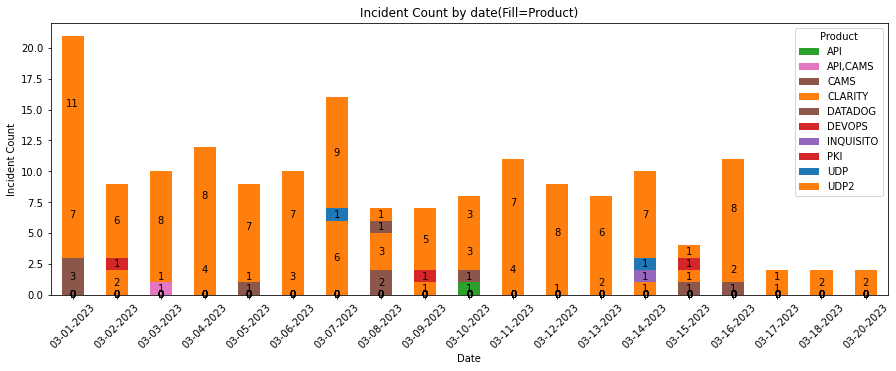

In [79]:
print('Date-Range :',sd,'to',ed)
ax = df1.groupby(['Date','Product']).size().unstack().plot(kind='bar',stacked=True,figsize=(15,5),color=product_color)
for c in ax.containers:
    ax.bar_label(c, label_type='center')
plt.xticks(rotation =45)
plt.title('Incident Count by date(Fill=Product)')
plt.ylabel('Incident Count')
plt.show()

Date-Range : 2023-03-01 02:10:00 to 2023-03-20 05:16:00


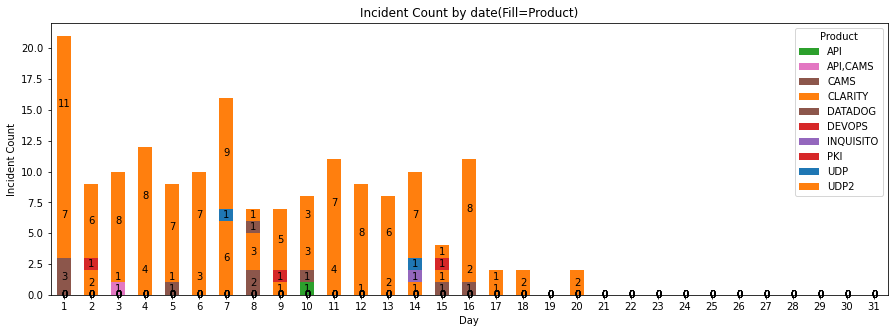

In [80]:
print('Date-Range :',sd,'to',ed)
ax = df1.groupby(['Day','Product']).size().unstack().reindex(sort_date).plot(kind='bar',stacked=True,figsize=(15,5),color=product_color)
for c in ax.containers:
    ax.bar_label(c, label_type='center')
plt.xticks(rotation =360)
plt.title('Incident Count by date(Fill=Product)')
plt.ylabel('Incident Count')
plt.show()

## Incident count by Weekday (Fill-Product)

Date-Range : 2023-03-01 02:10:00 to 2023-03-20 05:16:00


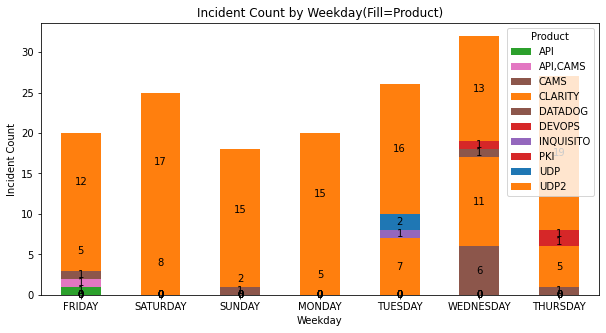

In [81]:
print('Date-Range :',sd,'to',ed)
ax = df1.groupby(['Weekday','Product']).size().unstack().reindex(sort_day).plot(kind='bar',stacked=True,figsize=(10,5),color=product_color)
for c in ax.containers:
    ax.bar_label(c, label_type='center')
plt.xticks(rotation =360)
plt.title('Incident Count by Weekday(Fill=Product)')
plt.ylabel('Incident Count')
plt.show()

## Incident count by Location(Fill-Product)

Date-Range : 2023-03-01 02:10:00 to 2023-03-20 05:16:00


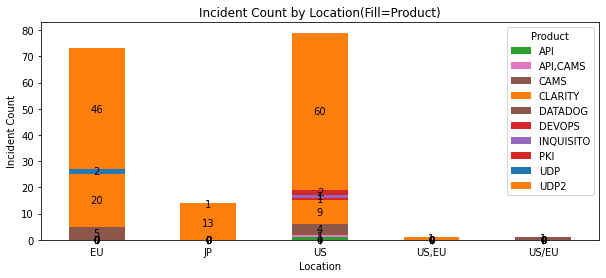

In [82]:
print('Date-Range :',sd,'to',ed)
ax = df1.groupby(['Location','Product']).size().unstack().plot(kind='bar',stacked=True,figsize=(10,4),color=product_color)
for c in ax.containers:
    ax.bar_label(c, label_type='center')
plt.xticks(rotation = 360)
plt.title('Incident Count by Location(Fill=Product)')
plt.ylabel('Incident Count')
plt.show()

## Auto-Resolved Incidents by Location(Fill-Product)

Date-Range : 2023-03-01 02:10:00 to 2023-03-20 05:16:00
Total no. Incidents auto-resolved: 162


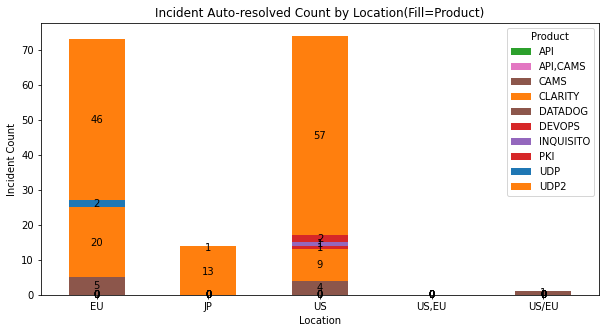

In [83]:
print('Date-Range :',sd,'to',ed)
df1_nar = df1.copy().reset_index()
df1_nar.drop(df1_nar[(df1_nar['NAR'] == 0)].index, inplace=True)
if df1_nar.shape[0] == 0:
    print("Their are 0 auto-resolved Incidents")
else:
    print("Total no. Incidents auto-resolved:",df1_nar.shape[0])
    ax = df1_nar.groupby(['Location','Product']).size().unstack().plot(kind='bar',stacked=True,figsize=(10,5),color=product_color)
    for c in ax.containers:
        ax.bar_label(c, label_type='center')
    plt.xticks(rotation = 360)
    plt.title('Incident Auto-resolved Count by Location(Fill=Product)')
    plt.ylabel('Incident Count')
    plt.show()

## Escalated Incident by Location(Fill-Product)

Date-Range : 2023-03-01 02:10:00 to 2023-03-20 05:16:00
Total number of Incidents Escalated to SME: 14


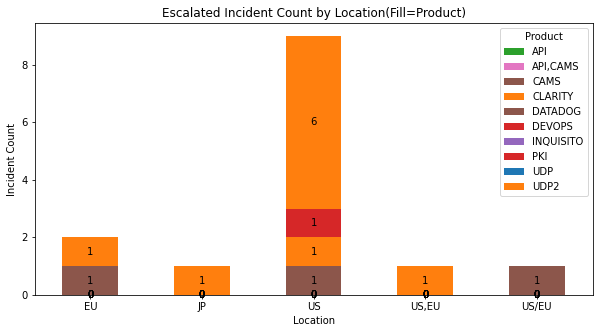

In [84]:
print('Date-Range :',sd,'to',ed)
df1_esc = df1.copy().reset_index()
df1_esc.drop(df1_esc[(df1_esc['ETS'] == 0)].index, inplace=True)
if df1_esc.shape[0] == 0:
    print("Their are 0 Incidents Escalated to SME")
else:
    print("Total number of Incidents Escalated to SME:",df1_esc.shape[0])
    ax = df1_esc.groupby(['Location','Product']).size().unstack().plot(kind='bar',stacked=True,figsize=(10,5),color=product_color)
    for c in ax.containers:
        ax.bar_label(c, label_type='center')
    plt.xticks(rotation = 360)
    plt.title('Escalated Incident Count by Location(Fill=Product)')
    plt.ylabel('Incident Count')
    plt.show()

## Incidents resolved by NOC - Location(Fill-Product)

Date-Range : 2023-03-01 02:10:00 to 2023-03-20 05:16:00
Total number of Incident Resolved by NOC: 2


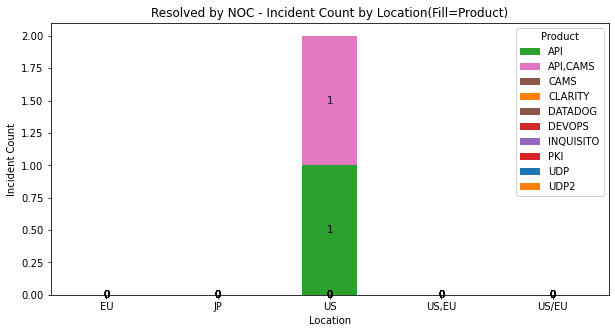

In [85]:
print('Date-Range :',sd,'to',ed)
df1_rne = df1.copy().reset_index()
df1_rne.drop(df1_rne[(df1_rne['RNE'] == 0)].index, inplace=True)
if df1_rne.shape[0] == 0:
    print("Their are 0 Incidents Resolved by NOC")
else:
    print("Total number of Incident Resolved by NOC:",df1_rne.shape[0])
    ax = df1_rne.groupby(['Location','Product']).size().unstack().plot(kind='bar',stacked=True,figsize=(10,5),color=product_color)
    for c in ax.containers:
        ax.bar_label(c, label_type='center')
    plt.xticks(rotation = 360)
    plt.title('Resolved by NOC - Incident Count by Location(Fill=Product)')
    plt.ylabel('Incident Count')
    plt.show()

## Final Count

In [86]:
print("Total number of Alerts Auto-Resolved :",df1_nar.shape[0])
print("Total number of Alerts Resolved by NOC :",df1_rne.shape[0])
print("Total number of Alerts Escalated to SME :",df1_esc.shape[0])

Total number of Alerts Auto-Resolved : 162
Total number of Alerts Resolved by NOC : 2
Total number of Alerts Escalated to SME : 14


Date-Range : 2023-03-01 02:10:00 to 2023-03-20 05:16:00


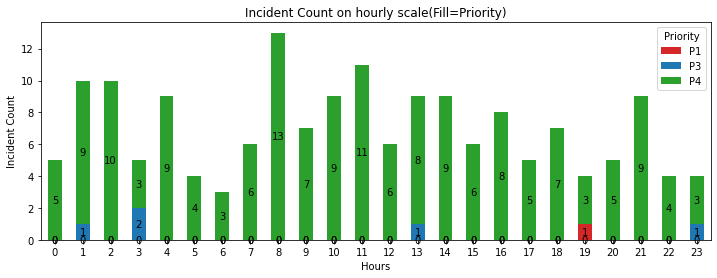

In [87]:
print('Date-Range :',sd,'to',ed)
ax = df1.groupby(['Hours','Priority']).size().unstack().reindex(sort_hour).plot(kind='bar',stacked=True,figsize=(12,4),color=priority_color)
for c in ax.containers:
    ax.bar_label(c, label_type='center')
plt.xticks(rotation = 360)
plt.title('Incident Count on hourly scale(Fill=Priority)')
plt.ylabel('Incident Count')
plt.show()

Date-Range : 2023-03-01 02:10:00 to 2023-03-20 05:16:00


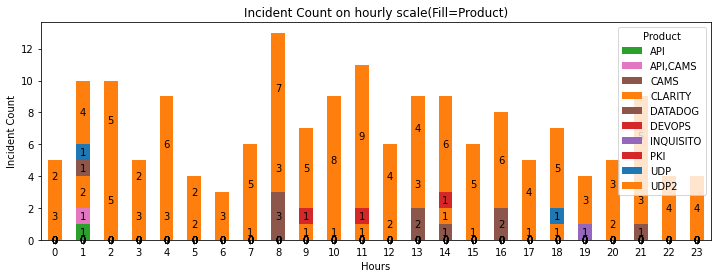

In [88]:
print('Date-Range :',sd,'to',ed)
ax = df1.groupby(['Hours','Product']).size().unstack().reindex(sort_hour).plot(kind='bar',stacked=True,figsize=(12,4),color=product_color)
for c in ax.containers:
    ax.bar_label(c, label_type='center')
plt.xticks(rotation = 360)
plt.title('Incident Count on hourly scale(Fill=Product)')
plt.ylabel('Incident Count')
plt.show()

In [89]:
pd.set_option('display.max_rows', None)

In [90]:
df2 = df1.copy()

In [91]:
df1['DateTime'] = df1['Date Time'].dt.strftime('%m/%d/%Y %H:%M:%S')

In [92]:
df1.columns

Index(['Jira Ticket', 'Subject', 'Product', 'Location', 'Priority',
       'Customer Impacted', 'Date Time', 'Incident End', 'First Assignment',
       'Actioned Time', 'Ticket created on', 'TTD', 'TTE', 'TTAE', 'TTA',
       'TTR', 'Assignee', 'NAR', 'RNE', 'ETS', 'TSG', 'RCA', 'Total Alerts',
       'Incident Start time', 'Escalated Time', 'Date', 'Month', 'Day', 'Year',
       'Quarter', 'Week', 'Weekday', 'Dayofyear', 'Weekofyear', 'date_ordinal',
       'Hours', 'Engage Time', 'TTAES', 'RBS', 'Shift', 'Shifts', 'DateTime'],
      dtype='object')

In [93]:
df1.groupby(['TTAE','TTA','TTAES']).size()

TTAE   TTA    TTAES
8.0    134.0  8        1
10.0   40.0   10       1
38.0   105.0  38       1
108.0  124.0  108      1
dtype: int64

In [94]:
df_scplt_tte = df1.filter(['DateTime','TTE'])

In [95]:
df_scplt_ttae = df1.filter(['DateTime','TTAE','TTA','TTAES'])

In [96]:
df_scplt_ttae = df_scplt_ttae[df_scplt_ttae['TTAES'] > 0]

In [97]:
df_scplt_tte.to_excel('ScatterPlot_tte.xlsx', index=False)

In [98]:
df_scplt_ttae.to_excel('ScatterPlot_ttea.xlsx', index=False)

In [99]:
df1.drop(['DateTime'], axis = 1,inplace=True)

## Copying data to Tableau Data Source

In [100]:
df_tab = df1.copy()

In [101]:
df_tab.columns

Index(['Jira Ticket', 'Subject', 'Product', 'Location', 'Priority',
       'Customer Impacted', 'Date Time', 'Incident End', 'First Assignment',
       'Actioned Time', 'Ticket created on', 'TTD', 'TTE', 'TTAE', 'TTA',
       'TTR', 'Assignee', 'NAR', 'RNE', 'ETS', 'TSG', 'RCA', 'Total Alerts',
       'Incident Start time', 'Escalated Time', 'Date', 'Month', 'Day', 'Year',
       'Quarter', 'Week', 'Weekday', 'Dayofyear', 'Weekofyear', 'date_ordinal',
       'Hours', 'Engage Time', 'TTAES', 'RBS', 'Shift', 'Shifts'],
      dtype='object')

In [102]:
df_tab.columns = ['Jira Ticket','Subject','Service','Location','Priority',
                  'Customer Impacted','Opened On','Incident End Time','Engage Time',
                  'Actioned Time','Ticket created','TTD','TTE','TTAE','TTA',
                  'TTR','NOC User','No Action Required','Resolved by NOC Engineer','Escalated to SME','TSG Available','RCA','Total Alerts',
                  'Incident Start time','Escalated Time', 'Date', 'Month', 'Day', 'Year',
                  'Quarter', 'Week', 'Weekday', 'Dayofyear', 'Weekofyear', 'date_ordinal',
                  'Hours','First Assignment','TTAES', 'Resolved by SME', 'Shift', 'Shifts']

In [103]:
df_tab1 = df_tab.filter(['Jira Ticket','Subject','Service','Location','Priority','Customer Impacted','Incident Start time','Opened On','Incident End Time','First Assignment','Actioned Time','Ticket created','Escalated Time','NOC User','No Action Required','Resolved by NOC Engineer','Escalated to SME', 'Resolved by SME','TSG Available','RCA'])

In [104]:
df_tab1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 41
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Jira Ticket               168 non-null    object        
 1   Subject                   168 non-null    object        
 2   Service                   168 non-null    category      
 3   Location                  168 non-null    category      
 4   Priority                  168 non-null    category      
 5   Customer Impacted         168 non-null    object        
 6   Incident Start time       168 non-null    datetime64[ns]
 7   Opened On                 168 non-null    datetime64[ns]
 8   Incident End Time         168 non-null    datetime64[ns]
 9   First Assignment          168 non-null    datetime64[ns]
 10  Actioned Time             48 non-null     object        
 11  Ticket created            165 non-null    object        
 12  Escalated Time         

In [105]:
df_tab2 = df_tab1.reset_index()

In [106]:
df_tab1.to_csv('Tableau_results.csv', index=False)

Date-Range : 2023-03-01 02:10:00 to 2023-03-20 05:16:00


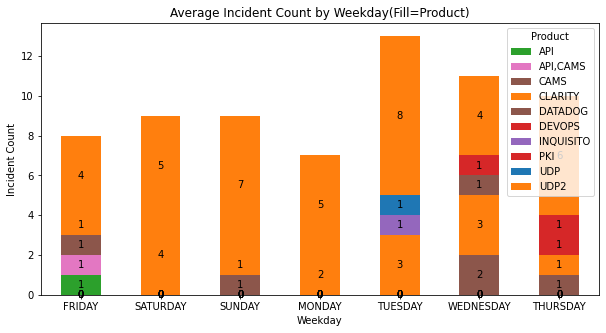

In [107]:
print('Date-Range :',sd,'to',ed)
df03 = df2.groupby(['Product','Weekday','Date']).size().reset_index().rename(columns={0:'count'})
df03.drop(df03[(df03['count'] == 0)].index, inplace=True)
df04 = df03.copy().reset_index()
df04.drop('index',axis=1,inplace=True)
df05 = df04.groupby(['Weekday','Product'],as_index=False).agg('mean')
df06 = df05.copy()
df06 = df06.dropna()
df06['count'] = df06['count'].apply(np.int64)
df07 = df06.copy().reset_index()
df07.drop('index',axis=1,inplace=True)
ax = df07.pivot(index='Weekday', columns='Product', values='count').reindex(sort_day).plot(kind='bar',stacked=True, figsize=(10,5),color=product_color)
for c in ax.containers:
    ax.bar_label(c, label_type='center')
plt.xticks(rotation = 360)
plt.title('Average Incident Count by Weekday(Fill=Product)')
plt.ylabel('Incident Count')
plt.show()

Date-Range : 2023-03-01 02:10:00 to 2023-03-20 05:16:00


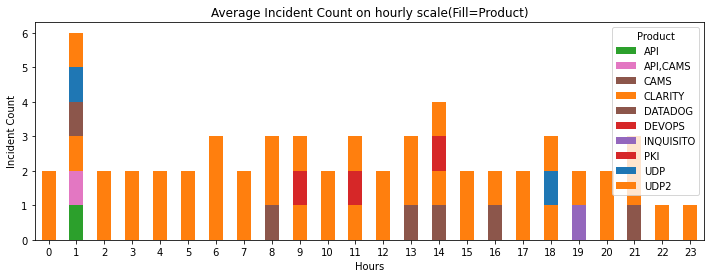

In [108]:
print('Date-Range :',sd,'to',ed)
df3 = df2.groupby(['Product','Hours','Date']).size().reset_index().rename(columns={0:'count'})
df3.drop(df3[(df3['count'] == 0)].index, inplace=True)
df4 = df3.copy().reset_index()
df4.drop('index',axis=1,inplace=True)
df5 = df4.groupby(['Hours','Product'],as_index=False).agg('mean')
df6 = df5.copy()
df6 = df6.dropna()
df6['count'] = df6['count'].apply(np.int64)
df7 = df6.copy().reset_index()
df7.drop('index',axis=1,inplace=True)
df7.pivot(index='Hours', columns='Product', values='count').reindex(sort_hour).plot(kind='bar',stacked=True, figsize=(12,4),color=product_color)
plt.xticks(rotation = 360)
plt.title('Average Incident Count on hourly scale(Fill=Product)')
plt.ylabel('Incident Count')
plt.show()

Date-Range : 2023-03-01 02:10:00 to 2023-03-20 05:16:00
Total number of Alerts Escalated to SME: 14


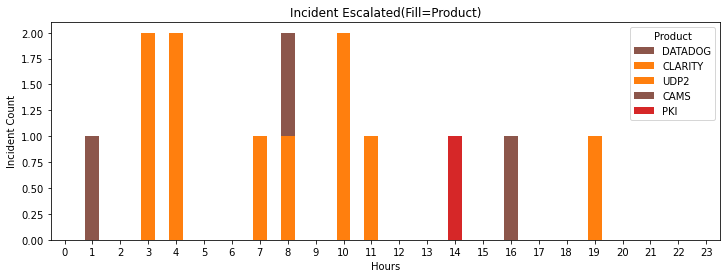

In [109]:
print('Date-Range :',sd,'to',ed)
print("Total number of Alerts Escalated to SME:",df1_esc.shape[0])
df13 = df2.groupby(['Product','Hours','ETS']).size().reset_index().rename(columns={0:'count'})
df13.drop(df13[(df13['count'] == 0)].index, inplace=True)
df14 = df13.copy().reset_index()
df14.drop('index',axis=1,inplace=True)
df14.drop(df14[(df14['ETS'] == 0)].index, inplace=True)
df15 = df14.groupby(['Hours','Product'],as_index=False).agg('mean')
df16 = df15.copy()
df16 = df16.dropna()
df17 = df16.copy().reset_index()
df17.drop('index',axis=1,inplace=True)
if df17.shape[0] == 0:
    print("Their are no Incidents esclated")
else:
    df17.pivot(index='Hours', columns='Product', values='count').reindex(sort_hour).plot(kind='bar',stacked=True, figsize=(12,4),color=product_color)
    plt.xticks(rotation = 360)
    plt.title('Incident Escalated(Fill=Product)')
    plt.ylabel('Incident Count')
    plt.show()

Date-Range : 2023-03-01 02:10:00 to 2023-03-20 05:16:00
Total number of Alerts Escalated to SME: 14


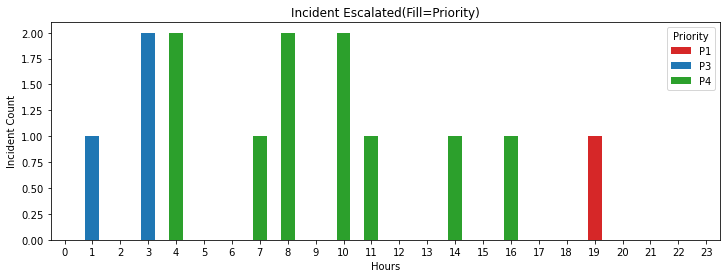

In [110]:
print('Date-Range :',sd,'to',ed)
print("Total number of Alerts Escalated to SME:",df1_esc.shape[0])
df23 = df2.groupby(['Priority','Hours','ETS']).size().reset_index().rename(columns={0:'count'})
df23.drop(df23[(df23['count'] == 0)].index, inplace=True)
df24 = df23.copy().reset_index()
df24.drop('index',axis=1,inplace=True)
df24.drop(df24[(df24['ETS'] == 0)].index, inplace=True)
df25 = df24.groupby(['Hours','Priority'],as_index=False).agg('mean')
df26 = df25.copy()
df26 = df26.dropna()
df27 = df26.copy().reset_index()
df27.drop('index',axis=1,inplace=True)
if df27.shape[0] == 0:
    print("Their are no Incidents esclated")
else:
    df27.pivot(index='Hours', columns='Priority', values='count').reindex(sort_hour).plot(kind='bar',stacked=True, figsize=(12,4),color=priority_color)
    plt.title('Incident Escalated(Fill=Priority)')
    plt.ylabel('Incident Count')
    plt.xticks(rotation = 360)
    plt.show()

Date-Range : 2023-03-01 02:10:00 to 2023-03-20 05:16:00
Total number of Alerts Escalated to SME: 14


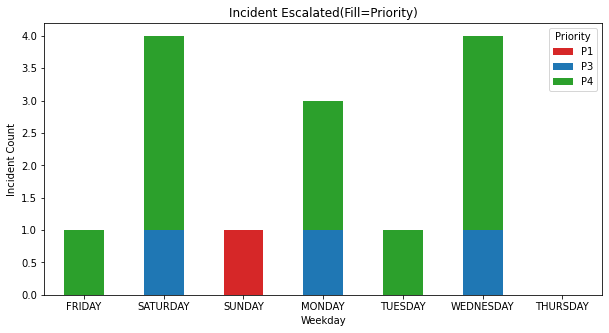

In [111]:
print('Date-Range :',sd,'to',ed)
print("Total number of Alerts Escalated to SME:",df1_esc.shape[0])
df33 = df2.groupby(['Priority','Weekday','ETS']).size().reset_index().rename(columns={0:'count'})
df33.drop(df33[(df33['count'] == 0)].index, inplace=True)
df34 = df33.copy().reset_index()
df34.drop('index',axis=1,inplace=True)
df34.drop(df34[(df34['ETS'] == 0)].index, inplace=True)
df35 = df34.groupby(['Weekday','Priority'],as_index=False).agg('mean')
df36 = df35.copy()
df36 = df36.dropna()
df37 = df36.copy().reset_index()
df37.drop('index',axis=1,inplace=True)
if df37.shape[0] == 0:
    print("Their are no Incidents esclated")
else:
    df37.pivot(index='Weekday', columns='Priority', values='count').reindex(sort_day).plot(kind='bar',stacked=True, figsize=(10,5),color=priority_color)
    plt.title('Incident Escalated(Fill=Priority)')
    plt.ylabel('Incident Count')
    plt.xticks(rotation = 360)
    plt.show()

Date-Range : 2023-03-01 02:10:00 to 2023-03-20 05:16:00
Total number of Alerts Escalated to SME: 14


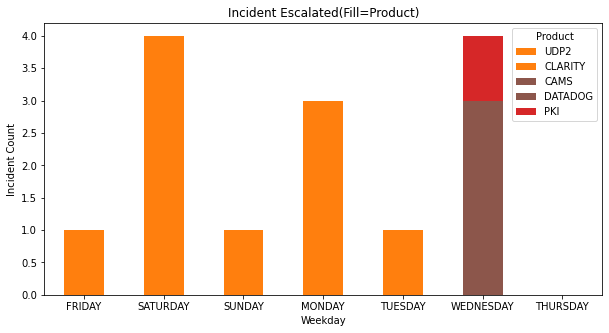

In [112]:
print('Date-Range :',sd,'to',ed)
print("Total number of Alerts Escalated to SME:",df1_esc.shape[0])
df43 = df2.groupby(['Product','Weekday','ETS']).size().reset_index().rename(columns={0:'count'})
df43.drop(df43[(df43['count'] == 0)].index, inplace=True)
df44 = df43.copy().reset_index()
df44.drop('index',axis=1,inplace=True)
df44.drop(df44[(df44['ETS'] == 0)].index, inplace=True)
df45 = df44.groupby(['Weekday','Product'],as_index=False).agg('mean')
df46 = df45.copy()
df46 = df46.dropna()
df47 = df46.copy().reset_index()
df47.drop('index',axis=1,inplace=True)
if df47.shape[0] == 0:
    print("Their are no Incidents esclated")
else:
    df47.pivot(index='Weekday', columns='Product', values='count').reindex(sort_day).plot(kind='bar',stacked=True, figsize=(10,5),color=product_color)
    plt.title('Incident Escalated(Fill=Product)')
    plt.ylabel('Incident Count')
    plt.xticks(rotation = 360)
    plt.show()

In [113]:
df2.columns

Index(['Jira Ticket', 'Subject', 'Product', 'Location', 'Priority',
       'Customer Impacted', 'Date Time', 'Incident End', 'First Assignment',
       'Actioned Time', 'Ticket created on', 'TTD', 'TTE', 'TTAE', 'TTA',
       'TTR', 'Assignee', 'NAR', 'RNE', 'ETS', 'TSG', 'RCA', 'Total Alerts',
       'Incident Start time', 'Escalated Time', 'Date', 'Month', 'Day', 'Year',
       'Quarter', 'Week', 'Weekday', 'Dayofyear', 'Weekofyear', 'date_ordinal',
       'Hours', 'Engage Time', 'TTAES', 'RBS', 'Shift', 'Shifts'],
      dtype='object')

In [114]:
df2.Weekday.unique()

array(['WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY', 'MONDAY',
       'TUESDAY'], dtype=object)

In [115]:
df2_Mon = df2[df2.Weekday == "MONDAY"]
df2_Tue = df2[df2.Weekday == "TUESDAY"]
df2_Wed = df2[df2.Weekday == "WEDNESDAY"]
df2_Thu = df2[df2.Weekday == "THURSDAY"]
df2_Fri = df2[df2.Weekday == "FRIDAY"]
df2_Sat = df2[df2.Weekday == "SATURDAY"]
df2_Sun = df2[df2.Weekday == "SUNDAY"]

Date-Range : 2023-03-01 02:10:00 to 2023-03-20 05:16:00
Total number of Incidents came on Friday : 18


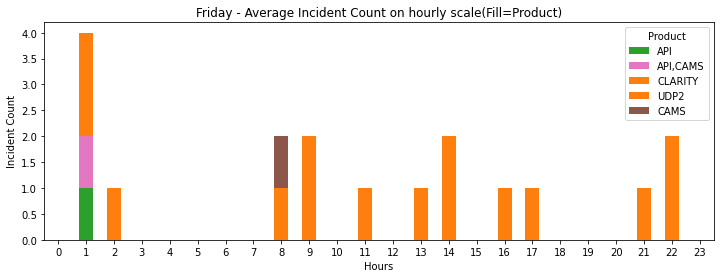

In [116]:
print('Date-Range :',sd,'to',ed)
df3_Fri = df2_Fri.groupby(['Product','Hours','Date']).size().reset_index().rename(columns={0:'count'})
df3_Fri.drop(df3_Fri[(df3_Fri['count'] == 0)].index, inplace=True)
df4_Fri = df3_Fri.copy().reset_index()
df4_Fri.drop('index',axis=1,inplace=True)
df5_Fri = df4_Fri.groupby(['Hours','Product'],as_index=False).agg('mean')
df6_Fri = df5_Fri.copy()
df6_Fri = df6_Fri.dropna()
df6_Fri['count'] = df6_Fri['count'].apply(np.int64)
df7_Fri = df6_Fri.copy().reset_index()
df7_Fri.drop('index',axis=1,inplace=True)
print("Total number of Incidents came on Friday :",df7_Fri['count'].sum())
if df7_Fri.shape[0] == 0:
    print("Their are no Incidents on Friday")
else:
    df7_Fri.pivot(index='Hours', columns='Product', values='count').reindex(sort_hour).plot(kind='bar',stacked=True, figsize=(12,4),color=product_color)
    plt.title('Friday - Average Incident Count on hourly scale(Fill=Product)')
    plt.ylabel('Incident Count')
    plt.xticks(rotation = 360)
    plt.show()

Date-Range : 2023-03-01 02:10:00 to 2023-03-20 05:16:00
Total number of Incidents came on Saturday : 21


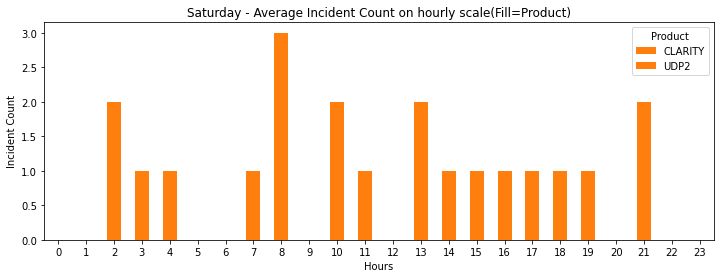

In [117]:
print('Date-Range :',sd,'to',ed)
df3_Sat = df2_Sat.groupby(['Product','Hours','Date']).size().reset_index().rename(columns={0:'count'})
df3_Sat.drop(df3_Sat[(df3_Sat['count'] == 0)].index, inplace=True)
df4_Sat = df3_Sat.copy().reset_index()
df4_Sat.drop('index',axis=1,inplace=True)
df5_Sat = df4_Sat.groupby(['Hours','Product'],as_index=False).agg('mean')
df6_Sat = df5_Sat.copy()
df6_Sat = df6_Sat.dropna()
df6_Sat['count'] = df6_Sat['count'].apply(np.int64)
df7_Sat = df6_Sat.copy().reset_index()
df7_Sat.drop('index',axis=1,inplace=True)
print("Total number of Incidents came on Saturday :",df7_Sat['count'].sum())
if df7_Sat.shape[0] == 0:
    print("Their are no Incidents on Saturday")
else:
    df7_Sat.pivot(index='Hours', columns='Product', values='count').reindex(sort_hour).plot(kind='bar',stacked=True, figsize=(12,4),color=product_color)
    plt.title('Saturday - Average Incident Count on hourly scale(Fill=Product)')
    plt.ylabel('Incident Count')
    plt.xticks(rotation = 360)
    plt.show()

Date-Range : 2023-03-01 02:10:00 to 2023-03-20 05:16:00
Total number of Incidents came on Sunday : 16


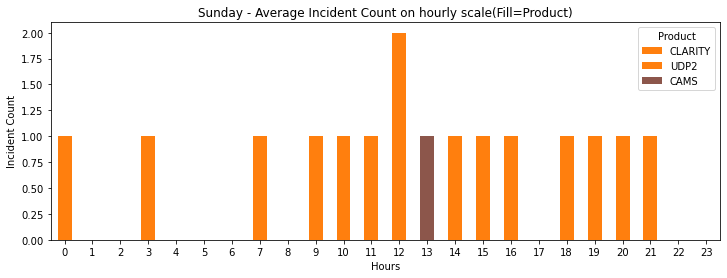

In [118]:
print('Date-Range :',sd,'to',ed)
df3_Sun = df2_Sun.groupby(['Product','Hours','Date']).size().reset_index().rename(columns={0:'count'})
df3_Sun.drop(df3_Sun[(df3_Sun['count'] == 0)].index, inplace=True)
df4_Sun = df3_Sun.copy().reset_index()
df4_Sun.drop('index',axis=1,inplace=True)
df5_Sun = df4_Sun.groupby(['Hours','Product'],as_index=False).agg('mean')
df6_Sun = df5_Sun.copy()
df6_Sun = df6_Sun.dropna()
df6_Sun['count'] = df6_Sun['count'].apply(np.int64)
df7_Sun = df6_Sun.copy().reset_index()
df7_Sun.drop('index',axis=1,inplace=True)
print("Total number of Incidents came on Sunday :",df7_Sun['count'].sum())
if df7_Sun.shape[0] == 0:
    print("Their are no Incidents on Thursday")
else:
    df7_Sun.pivot(index='Hours', columns='Product', values='count').reindex(sort_hour).plot(kind='bar',stacked=True, figsize=(12,4),color=product_color)
    plt.title('Sunday - Average Incident Count on hourly scale(Fill=Product)')
    plt.ylabel('Incident Count')
    plt.xticks(rotation = 360)
    plt.show()

Date-Range : 2023-03-01 02:10:00 to 2023-03-20 05:16:00
Total number of Incidents came on Monday : 15


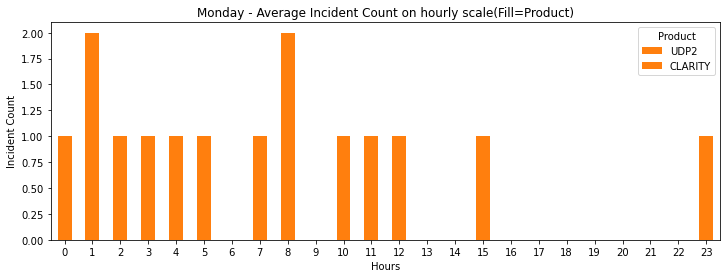

In [119]:
print('Date-Range :',sd,'to',ed)
df3_Mon = df2_Mon.groupby(['Product','Hours','Date']).size().reset_index().rename(columns={0:'count'})
df3_Mon.drop(df3_Mon[(df3_Mon['count'] == 0)].index, inplace=True)
df4_Mon = df3_Mon.copy().reset_index()
df4_Mon.drop('index',axis=1,inplace=True)
df5_Mon = df4_Mon.groupby(['Hours','Product'],as_index=False).agg('mean')
df6_Mon = df5_Mon.copy()
df6_Mon = df6_Mon.dropna()
df6_Mon['count'] = df6_Mon['count'].apply(np.int64)
df7_Mon = df6_Mon.copy().reset_index()
df7_Mon.drop('index',axis=1,inplace=True)
print("Total number of Incidents came on Monday :",df7_Mon['count'].sum())
if df7_Mon.shape[0] == 0:
    print("Their are no Incidents on Thursday")
else:
    df7_Mon.pivot(index='Hours', columns='Product', values='count').reindex(sort_hour).plot(kind='bar',stacked=True, figsize=(12,4),color=product_color)
    plt.title('Monday - Average Incident Count on hourly scale(Fill=Product)')
    plt.ylabel('Incident Count')
    plt.xticks(rotation = 360)
    plt.show()

Date-Range : 2023-03-01 02:10:00 to 2023-03-20 05:16:00
Total number of Incidents came on Tuesday : 23


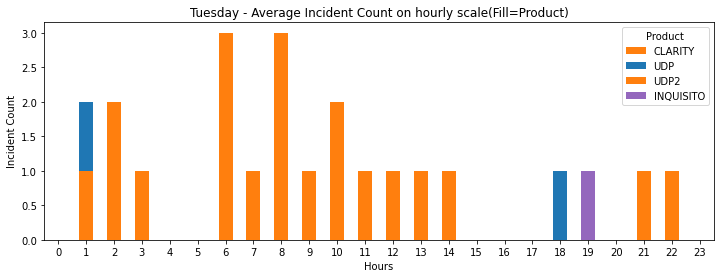

In [120]:
print('Date-Range :',sd,'to',ed)
df3_Tue = df2_Tue.groupby(['Product','Hours','Date']).size().reset_index().rename(columns={0:'count'})
df3_Tue.drop(df3_Tue[(df3_Tue['count'] == 0)].index, inplace=True)
df4_Tue = df3_Tue.copy().reset_index()
df4_Tue.drop('index',axis=1,inplace=True)
df5_Tue = df4_Tue.groupby(['Hours','Product'],as_index=False).agg('mean')
df6_Tue = df5_Tue.copy()
df6_Tue = df6_Tue.dropna()
df6_Tue['count'] = df6_Tue['count'].apply(np.int64)
df7_Tue = df6_Tue.copy().reset_index()
df7_Tue.drop('index',axis=1,inplace=True)
print("Total number of Incidents came on Tuesday :",df7_Tue['count'].sum())
if df7_Tue.shape[0] == 0:
    print("Their are no Incidents on Tuesday")
else:
    df7_Tue.pivot(index='Hours', columns='Product', values='count').reindex(sort_hour).plot(kind='bar',stacked=True, figsize=(12,4),color=product_color)
    plt.title('Tuesday - Average Incident Count on hourly scale(Fill=Product)')
    plt.ylabel('Incident Count')
    plt.xticks(rotation = 360)
    plt.show()

Date-Range : 2023-03-01 02:10:00 to 2023-03-20 05:16:00
Total number of Incidents came on Wednesday : 28


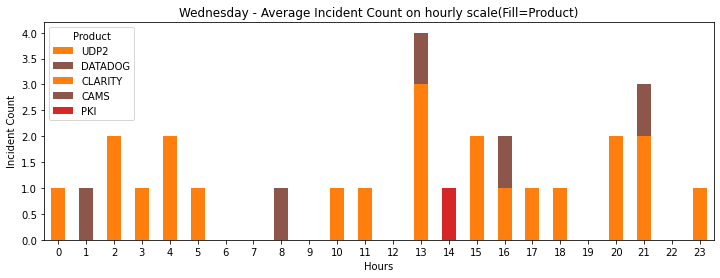

In [121]:
print('Date-Range :',sd,'to',ed)
df3_Wed = df2_Wed.groupby(['Product','Hours','Date']).size().reset_index().rename(columns={0:'count'})
df3_Wed.drop(df3_Wed[(df3_Wed['count'] == 0)].index, inplace=True)
df4_Wed = df3_Wed.copy().reset_index()
df4_Wed.drop('index',axis=1,inplace=True)
df5_Wed = df4_Wed.groupby(['Hours','Product'],as_index=False).agg('mean')
df6_Wed = df5_Wed.copy()
df6_Wed = df6_Wed.dropna()
df6_Wed['count'] = df6_Wed['count'].apply(np.int64)
df7_Wed = df6_Wed.copy().reset_index()
df7_Wed.drop('index',axis=1,inplace=True)
print("Total number of Incidents came on Wednesday :",df7_Wed['count'].sum())
if df7_Wed.shape[0] == 0:
    print("Their are no Incidents on Wednesday")
else:
    df7_Wed.pivot(index='Hours', columns='Product', values='count').reindex(sort_hour).plot(kind='bar',stacked=True, figsize=(12,4),color=product_color)
    plt.title('Wednesday - Average Incident Count on hourly scale(Fill=Product)')
    plt.ylabel('Incident Count')
    plt.xticks(rotation = 360)
    plt.show()

Date-Range : 2023-03-01 02:10:00 to 2023-03-20 05:16:00
Total number of Incidents came on Thursday : 21


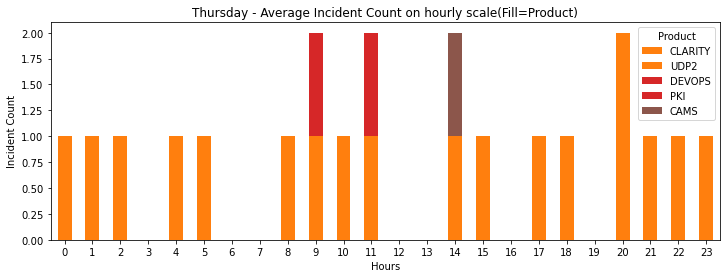

In [122]:
print('Date-Range :',sd,'to',ed)
df3_Thu = df2_Thu.groupby(['Product','Hours','Date']).size().reset_index().rename(columns={0:'count'})
df3_Thu.drop(df3_Thu[(df3_Thu['count'] == 0)].index, inplace=True)
df4_Thu = df3_Thu.copy().reset_index()
df4_Thu.drop('index',axis=1,inplace=True)
df5_Thu = df4_Thu.groupby(['Hours','Product'],as_index=False).agg('mean')
df6_Thu = df5_Thu.copy()
df6_Thu = df6_Thu.dropna()
df6_Thu['count'] = df6_Thu['count'].apply(np.int64)
df7_Thu = df6_Thu.copy().reset_index()
df7_Thu.drop('index',axis=1,inplace=True)
print("Total number of Incidents came on Thursday :",df7_Thu['count'].sum())
if df7_Thu.shape[0] == 0:
    print("Their are no Incidents on Thursday")
else:
    df7_Thu.pivot(index='Hours', columns='Product', values='count').reindex(sort_hour).plot(kind='bar',stacked=True, figsize=(12,4),color=product_color)
    plt.title('Thursday - Average Incident Count on hourly scale(Fill=Product)')
    plt.ylabel('Incident Count')
    plt.xticks(rotation = 360)
    plt.show()

In [123]:
ttd_m = round(df1.describe()['TTD']['mean'],2)
tte_m = round(df1.describe()['TTE']['mean'],2)
ttes_m = round(df1.describe()['TTAE']['mean'],2)
tta_m = round(df1.describe()['TTA']['mean'],2)
ttr_m = round(df1.describe()['TTR']['mean'],2)

In [124]:
#df1 = df1.drop_duplicates(subset=["Jira Ticket"], keep='last')

In [125]:
tsg_a = df1.TSG.sum()
total_inc = df1.shape[0]
tsg_na = total_inc - tsg_a

In [126]:
df1.TSG.unique()

array([0, 1], dtype=int64)

## Identify Minumum Values for all the MTTx metrics

In [127]:
print("Minumum Value for all the MTTx metrics")
df1.groupby(by='Priority').agg(Count=('Priority', 'size'),TTD=('TTD', 'min'), TTE=('TTE', 'min'),TTA=('TTA', 'min'),TTES=('TTAE', 'min') ,TTR=('TTR', 'min'),No_action_required=('NAR', 'sum'),Escalated=('ETS', 'sum'),Resolved_by_NOC=('RNE', 'sum'))

Minumum Value for all the MTTx metrics


,Count,TTD,TTE,TTA,TTES,TTR,No_action_required,Escalated,Resolved_by_NOC
Priority,,,,,,,,,
P1,1,1,0.0,40.0,10.0,80.0,0,1,0
P3,5,1,0.0,134.0,6.0,59.0,4,3,0
P4,162,1,0.0,3.0,1.0,1.0,158,10,2


## Identify Maximum Values for all the MTTx metrics

In [128]:
print("Maximum Value for all the MTTX metrics")
df1.groupby(by='Priority').agg(Count=('Priority', 'size'),TTD=('TTD', 'max'), TTE=('TTE', 'max'),TTA=('TTA', 'max'),TTES=('TTAE', 'max') ,TTR=('TTR', 'max'),No_action_required=('NAR', 'sum'),Escalated=('ETS', 'sum'),Resolved_by_NOC=('RNE', 'sum'))

Maximum Value for all the MTTX metrics


,Count,TTD,TTE,TTA,TTES,TTR,No_action_required,Escalated,Resolved_by_NOC
Priority,,,,,,,,,
P1,1,1,0.0,40.0,10.0,80.0,0,1,0
P3,5,1,1.0,134.0,26.0,1763.0,4,3,0
P4,162,1,9.0,124.0,108.0,409.0,158,10,2


In [129]:
print('Date-Range :',sd,'to',ed)
print("Total number of Incidents :",total_inc)
print("##################################################################################################\n")
print("MTTx Values:-\n-------------------")
print("MTTd :",ttd_m,"\nMTTe :",tte_m,"\nMTTes :",ttes_m,"\nMTTa :",tta_m,"\nMTTr :",ttr_m)
print("##################################################################################################\n")
print("Auto-Resolved, Escalated and Resolved by NOC :-\n-------------------------------------------------")
print("Auto-Resolved :",df1.NAR.sum(),"\nEscalated to SME :",df1.ETS.sum(),"\nResolved by NOC Engineer :",df1.RNE.sum(),"\nResolved by SME :",df1.RBS.sum())
print("##################################################################################################\n")
print("Total number of TSG Available/Not-Available :-\n-------------------------------------------------")
print("TSG Available :",tsg_a,"\nTSG Not Available :",tsg_na)
print("##################################################################################################\n")
print("SLA Calculation :-\n----------------------")
if df1_p4.shape[0] == 0:
    print("Their are no P4 Incidents")
else: 
    print("Their are total",df1_p4.shape[0],"P4 Incidents\nSLA for P4 TTE is",str(P4_SLA_TTE)+"%\nSLA for P4 TTAE is",str(P4_SLA_TTAE)+"%")
print("##################################################################################################\n")    
if df1_p3.shape[0] == 0:
    print("Their are no P3 Incidents")
else: 
    print("Their are total",df1_p3.shape[0],"P3 Incidents\nSLA for P3 TTE is",str(P3_SLA_TTE)+"%\nSLA for P3 TTAE is",str(P3_SLA_TTAE)+"%")
print("##################################################################################################\n")    
if df1_p2.shape[0] == 0:
    print("Their are no P2 Incidents")
else: 
    print("Their are total",df1_p2.shape[0],"P2 Incidents\nSLA for P2 TTE is",str(P2_SLA_TTE)+"%\nSLA for P2 TTAE is",str(P2_SLA_TTAE)+"%")
print("##################################################################################################\n")
if df1_p1.shape[0] == 0:
    print("Their are no P1 Incidents")
else: 
    print("Their are total",df1_p1.shape[0],"P1 Incidents\nSLA for P1 TTE is",str(P1_SLA_TTE)+"%\nSLA for P1 TTAE is",str(P1_SLA_TTAE)+"%")
print("##################################################################################################\n")

Date-Range : 2023-03-01 02:10:00 to 2023-03-20 05:16:00
Total number of Incidents : 168
##################################################################################################

MTTx Values:-
-------------------
MTTd : 1.0 
MTTe : 0.67 
MTTes : 20.21 
MTTa : 68.67 
MTTr : 68.93
##################################################################################################

Auto-Resolved, Escalated and Resolved by NOC :-
-------------------------------------------------
Auto-Resolved : 162 
Escalated to SME : 14 
Resolved by NOC Engineer : 2 
Resolved by SME : 4
##################################################################################################

Total number of TSG Available/Not-Available :-
-------------------------------------------------
TSG Available : 121 
TSG Not Available : 47
##################################################################################################

SLA Calculation :-
----------------------
Their are total 162 P4 Incidents
SLA

## Alert for which TSG's not avilable

In [130]:
df1[df1.TSG == 0]['Subject'].unique()

array(['UDP2 Prod EU: Cloudflare 403 Count Above Threshold',
       'UDP2 Prod US: Cloudflare 403 Count Above Threshold',
       'UDP2 Prod EU: Critical - Realtime - High Error Count',
       'UDP2 Prod US: Critical - Follow - Follower-Event-Filter-Service Service Low Processing Count',
       'UDP2 Prod US: Critical - Realtime - Completed Processing Count Below Threshold',
       'Clarity Prod JP: CRITICAL - P4 - 0.5% Subjects w/medium impact',
       'UDP2 Prod US: Critical - Push - Number of Running Retry Service Pods Below Threshold',
       'CAMS Prod EU: Critical - Kafka Consents Primary Failure',
       'UDP2 Prod US: Critical - Push Notification - Database Query Timeout Errors',
       'UDP2 Prod US: Critical - Bulkdata - Post Data Already Exists in Database',
       'UDP2 Prod US: Critical - Bulkdata - Completed Processing Count Below Threshold',
       'UDP2 Prod JP: Critical - Realtime - Completed Processing Count Below Threshold',
       'UDP Prod EU: Critical - Pubsub-to-k

## 